# CAVIAR Investigation Study

In this problem, you will study a time-varying criminal network that is repeatedly disturbed by police forces. The data for this problem can be found in the CAVIAR directory of the data archive.

The CAVIAR investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montréal police and the Royal Canadian Mounted Police of Canada. During this two-year period, 11 wiretap warrants, valid for a period of about two months each, were obtained (the 11 matrices contained in `phase1.csv`, `phase2.csv`, ..., correspond to these eleven, two-month wiretap phases).

This case is interesting because, unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting the perpetrators. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at 32 million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and others included multiple. The following summarizes the 11 seizures:

| Phase  | Seizures | Value ($)   | Quantity                     |
|--------|----------|-------------|------------------------------|
| Phase 4 | 1        | $2,500,000  | 300 kg of marijuana          |
| Phase 6 | 3        | $1,300,000  | 2 x 15 kg of marijuana + 1 x 2 kg of cocaine |
| Phase 7 | 1        | $3,500,000  | 401 kg of marijuana          |
| Phase 8 | 1        | $360,000    | 9 kg of cocaine              |
| Phase 9 | 2        | $4,300,000  | 2 kg of cocaine + 1 x 500 kg marijuana |
| Phase 10| 1        | $18,700,000 | 2200 kg of marijuana         |
| Phase 11| 2        | $1,300,000  | 12 kg of cocaine + 11 kg of cocaine |

This case offers a rare opportunity to study a criminal network in upheaval from police forces. This allows us to analyze changes in the network structure and to survey the reaction and adaptation of the participants while they were subjected to an increasing number of distressing constraints.

The network consists of 110 (numbered) players. Players 1-82 are the traffickers. Players 83-110 are the non-traffickers (financial investors; accountants; owners of various importation businesses, etc.). Initially, the investigation targeted Daniel Serero, the alleged mastermind of a drug network in downtown Montréal, who attempted to import marijuana to Canada from Morocco, transiting through Spain. After the first seizure, happening in Phase 4, traffickers reoriented to cocaine import from Colombia, transiting through the United States.

According to the police, the role of 23 of the players in the “Serero organization" are the following, listed by name (unique id):

- **Daniel Serero (n1)**: Mastermind of the network.
- **Pierre Perlini (n3)**: Principal lieutenant of Serero, he executes Serero's instructions.
- **Alain (n83) and Gérard (n86) Levy**: Investors and transporters of money.
- **Wallace Lee (n85)**: Takes care of financial affairs (accountant).
- **Gaspard Lino (n6)**: Broker in Spain.
- **Samir Rabbat (n11)**: Provider in Morocco.
- **Lee Gilbert (n88)**: Trusted man of Wallace Lee (became an informer after the arrest).
- **Beverly Ashton (n106)**: Spouse of Lino, transports money and documents.
- **Antonio Iannacci (n89)**: Investor.
- **Mohammed Echouafni (n84)**: Moroccan investor.
- **Richard Gleeson (n5), Bruno de Quinzio (n8) and Gabrielle Casale (n76)**: Charged with recuperating the marijuana.
- **Roderik Janouska (n77)**: Individual with airport contacts.
- **Patrick Lee (n87)**: Investor.
- **Salvatore Panetta (n82)**: Transport arrangements manager.
- **Steve Cunha (n96)**: Transport manager, owner of a legitimate import company (became an informer after the arrest).
- **Ernesto Morales (n12)**: Principal organizer of the cocaine import, intermediary between the Colombians and the Serero organization.
- **Oscar Nieri (n17)**: The handyman of Morales.
- **Richard Brebner (n80)**: Was transporting the cocaine from the US to Montréal.
- **Ricardo Negrinotti (n33)**: Was taking possession of the cocaine in the US to hand it to Brebner.
- **Johnny Pacheco (n16)**: Cocaine provider.

In the data files (`phase1.csv`, `phase2.csv`, ...), you will find matrices that report the number of wiretapped correspondences between the above players in the network, where players are identified by their unique id. You will be analyzing this time-varying network, giving a rough sketch of its shape, its evolution and the role of the actors in it.

Paper: [Modeling Verdict Outcomes Using Social Network Measures: The Watergate and Caviar Network Cases](https://www.researchgate.net/publication/292304919_Modeling_Verdict_Outcomes_Using_Social_Network_Measures_The_Watergate_and_Caviar_Network_Cases)


In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
phases = {}
G = {}
for i in range(1,12): 
    var_name = "phase" + str(i)
    file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
    phases[i] = pd.read_csv(file_name, index_col = ["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    phases[i][phases[i] > 0] = 1
    G[i] = nx.from_pandas_adjacency(phases[i])
    G[i].name = var_name

In [3]:
G

{1: <networkx.classes.graph.Graph at 0x10f448460>,
 2: <networkx.classes.graph.Graph at 0x1243c4d60>,
 3: <networkx.classes.graph.Graph at 0x1243c4700>,
 4: <networkx.classes.graph.Graph at 0x1243c4520>,
 5: <networkx.classes.graph.Graph at 0x1243c44c0>,
 6: <networkx.classes.graph.Graph at 0x1243c46d0>,
 7: <networkx.classes.graph.Graph at 0x1243c4310>,
 8: <networkx.classes.graph.Graph at 0x12440b070>,
 9: <networkx.classes.graph.Graph at 0x12440b130>,
 10: <networkx.classes.graph.Graph at 0x12440b2b0>,
 11: <networkx.classes.graph.Graph at 0x12440be80>}

In [4]:
phases[1]

n1  n4  n89  n83  n3  n5  n88  n85  n90  n2  n7  n54  n6  n64  n8
n1    0   1    1    0   1   1    1    1    1   1   0    1   0    1   1
n4    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
n89   1   0    0    0   0   0    0    0    0   0   1    0   0    0   0
n83   1   0    0    0   0   0    0    0    0   0   0    0   1    0   0
n3    1   0    0    0   0   0    1    0    0   0   0    0   0    0   0
n5    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
n88   1   0    0    0   1   0    0    1    0   0   0    0   1    0   0
n85   1   0    0    0   0   0    1    0    0   0   0    0   1    0   0
n90   0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
n2    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
n7    0   0    1    0   0   0    0    0    0   0   0    0   0    0   0
n54   0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
n6    0   0    0    0   0   0    1    0    0   0   0    0   0    0   0
n64   0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
n8    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0

## Part (a)
What is the size of the network at each phase? Plot the evolution of the number of node and number of edges over time, from phase 1 to 11.

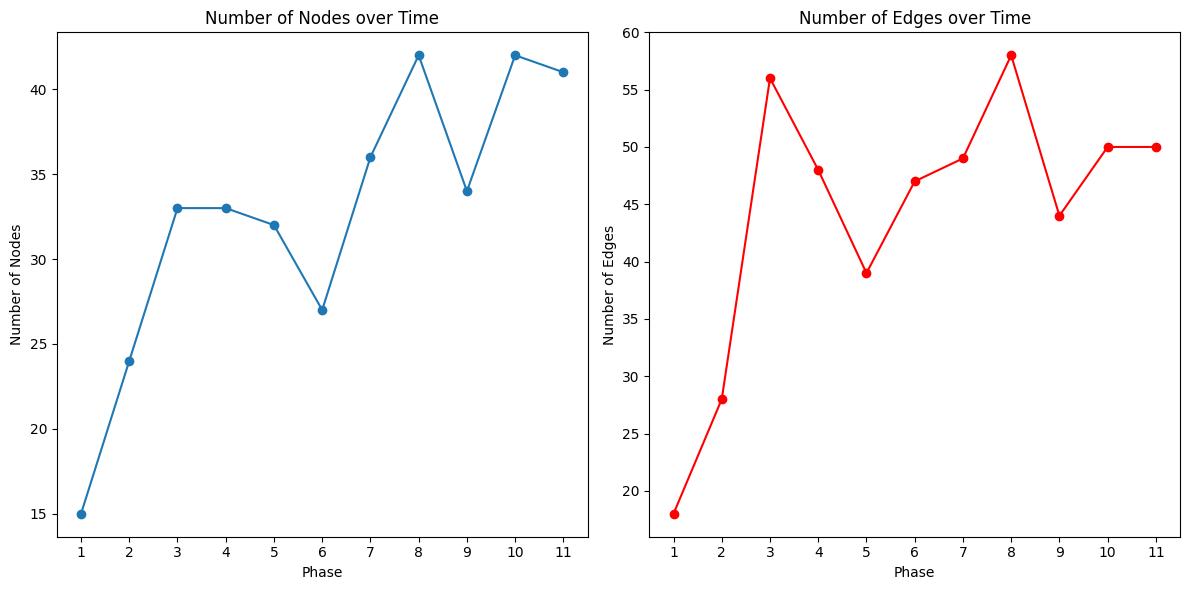

In [5]:
# Gather data on the size of the network at each phase
num_nodes = []
num_edges = []

for i in range(1, 12):
    num_nodes.append(G[i].number_of_nodes())
    num_edges.append(G[i].number_of_edges())

# Plot the evolution of the number of nodes and edges over time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 12), num_nodes, marker='o')
plt.title("Number of Nodes over Time")
plt.xlabel("Phase")
plt.ylabel("Number of Nodes")
plt.xticks(range(1, 12))

plt.subplot(1, 2, 2)
plt.plot(range(1, 12), num_edges, marker='o', color='r')
plt.title("Number of Edges over Time")
plt.xlabel("Phase")
plt.ylabel("Number of Edges")
plt.xticks(range(1, 12))

plt.tight_layout()
plt.show()


In [6]:
num_nodes[1], num_nodes[5], num_nodes[9]

(24, 27, 42)

In [7]:
num_edges[1], num_edges[5], num_edges[9]

(28, 47, 50)

In [8]:
# !sudo add-apt-repository universe -y
# !sudo apt update -y
# !sudo apt-get reinstall graphviz graphviz-dev -y
# !pip install pygraphviz

In [9]:
# !brew install graphviz
# !pip3 install pygraphviz

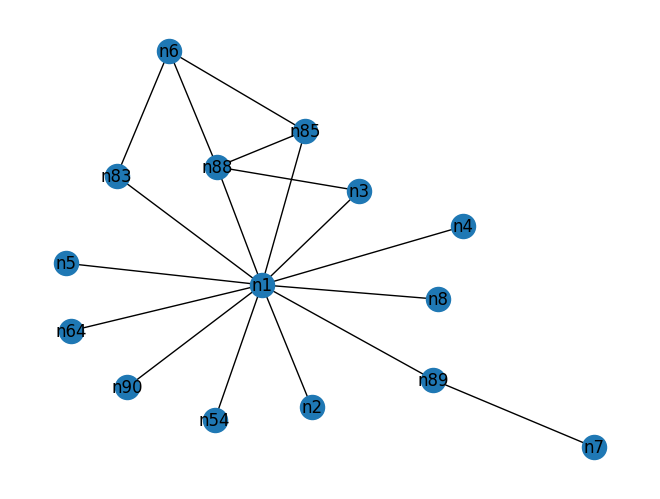

In [10]:
nx.draw(G[1], pos=nx.drawing.nx_agraph.graphviz_layout(G[1]), with_labels=True)  

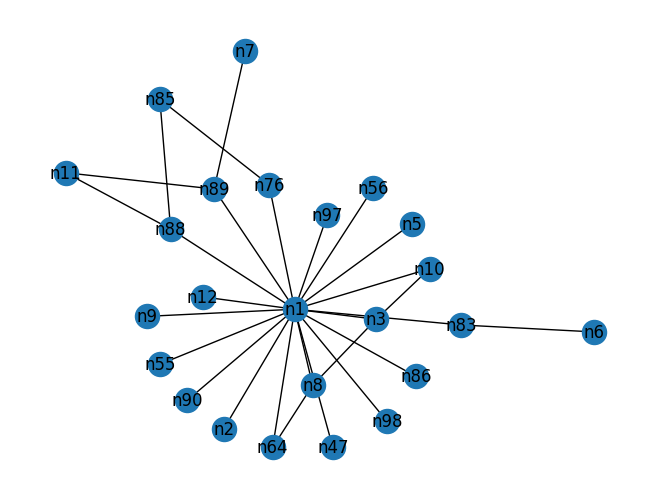

In [11]:
nx.draw(G[2], pos=nx.drawing.nx_agraph.graphviz_layout(G[2]), with_labels=True)  

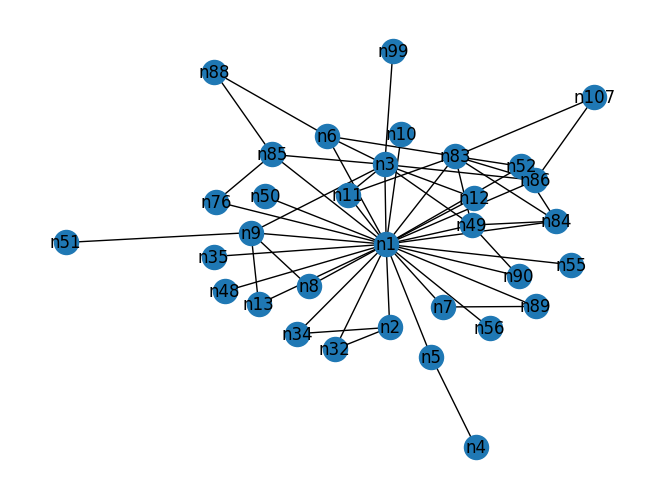

In [12]:
nx.draw(G[3], pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), with_labels=True)  

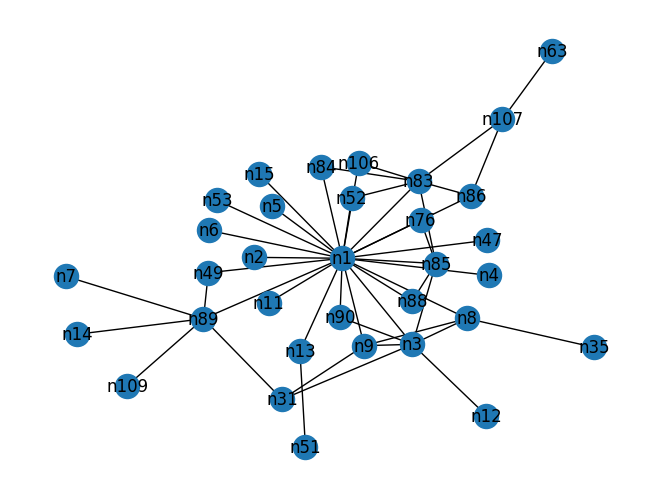

In [13]:
nx.draw(G[4], pos=nx.drawing.nx_agraph.graphviz_layout(G[4]), with_labels=True)  

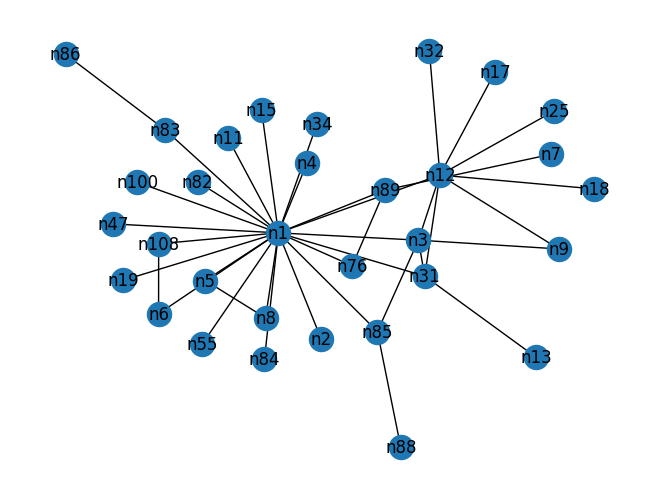

In [14]:
nx.draw(G[5], pos=nx.drawing.nx_agraph.graphviz_layout(G[5]), with_labels=True)  

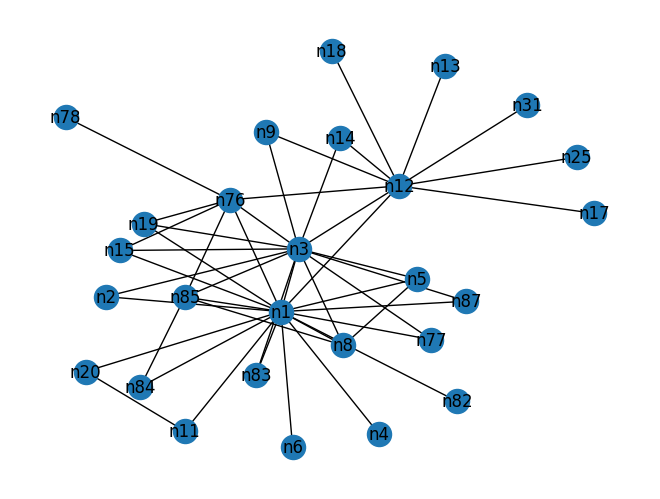

In [15]:
nx.draw(G[6], pos=nx.drawing.nx_agraph.graphviz_layout(G[6]), with_labels=True)  

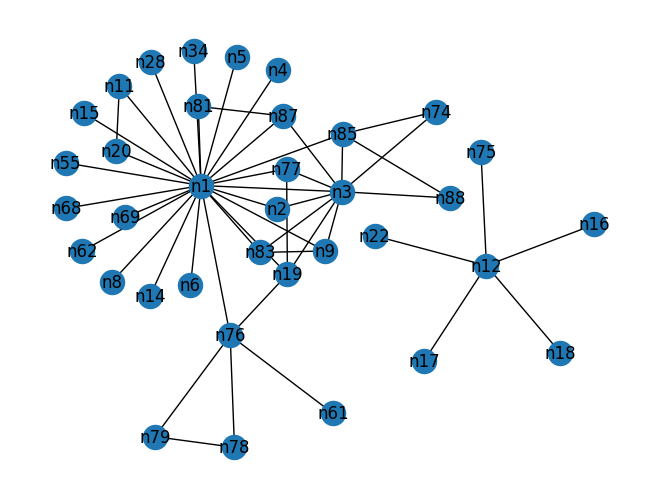

In [16]:
nx.draw(G[7], pos=nx.drawing.nx_agraph.graphviz_layout(G[7]), with_labels=True)  

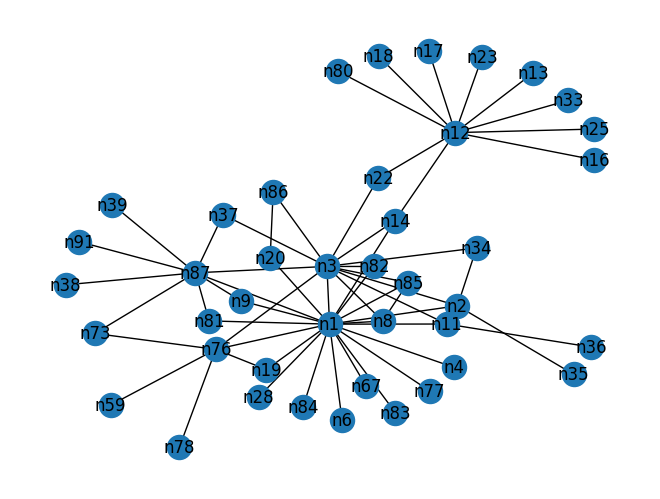

In [17]:
nx.draw(G[8], pos=nx.drawing.nx_agraph.graphviz_layout(G[8]), with_labels=True)  

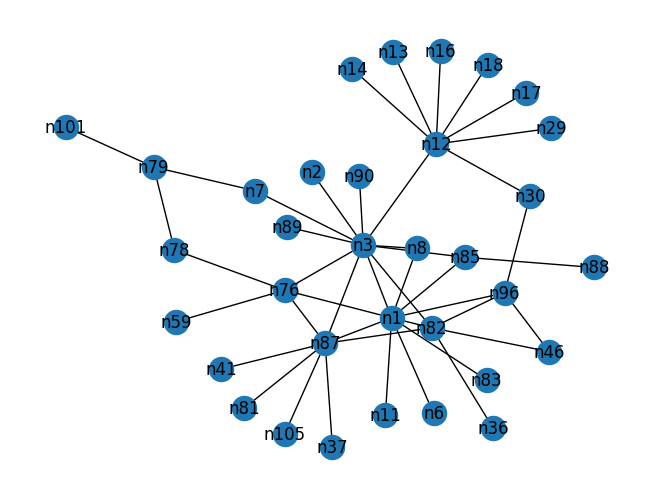

In [18]:
nx.draw(G[9], pos=nx.drawing.nx_agraph.graphviz_layout(G[9]), with_labels=True)  

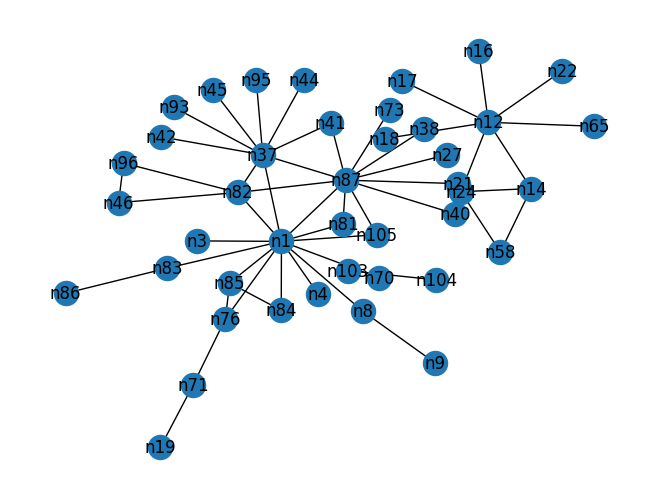

In [19]:
nx.draw(G[10], pos=nx.drawing.nx_agraph.graphviz_layout(G[10]), with_labels=True)  

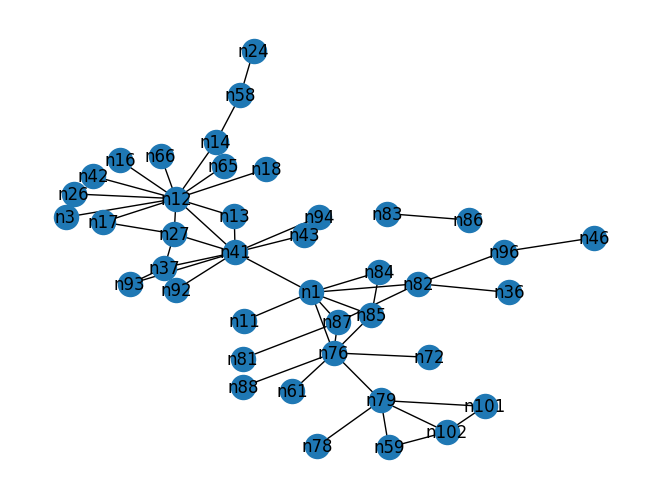

In [20]:
nx.draw(G[11], pos=nx.drawing.nx_agraph.graphviz_layout(G[11]), with_labels=True)  

## Part (b-c)

For each of the 11 phases and for each of the players under investigation (i.e., the 23 listed above) , compute and list the normalized degree centrality of the player.

The normalized degree centrality of node i is defined as

\displaystyle \tilde{k}_ i	\displaystyle = \frac{k_ i}{n-1},		
where k_ i is the degree of node i and n is the number of nodes in the graph.

You can compute the normalized degree centrality using the networkx function networkx.degree_centrality.

Provide the degree centrality for the following four players, at the specified phases: (Provide your answer to three significant figures, answer graded to 1% tolerance.)



In [21]:
degree_centrality_over_time  = {}
players = [f'n{i}' for i in range(1,111)]
for p in players:
    degree_centrality_over_time[p] = []
for i in range(1, 12):
    dc = nx.degree_centrality(G[i])
    for p in players:
        if p in dc:
            degree_centrality_over_time[p].append(dc[p])
        else:
            degree_centrality_over_time[p].append(-1)
degree_centrality_over_time

{'n1': [0.8571428571428571,
  0.8260869565217391,
  0.84375,
  0.71875,
  0.7096774193548387,
  0.6923076923076923,
  0.6857142857142857,
  0.4878048780487805,
  0.30303030303030304,
  0.3170731707317073,
  0.17500000000000002],
 'n2': [0.07142857142857142,
  0.043478260869565216,
  0.09375,
  0.03125,
  0.03225806451612903,
  0.07692307692307693,
  0.05714285714285714,
  0.0975609756097561,
  0.030303030303030304,
  -1,
  -1],
 'n3': [0.14285714285714285,
  0.13043478260869565,
  0.28125,
  0.21875,
  0.16129032258064516,
  0.5384615384615385,
  0.2857142857142857,
  0.3170731707317073,
  0.33333333333333337,
  0.024390243902439025,
  0.025],
 'n4': [0.07142857142857142,
  -1,
  0.03125,
  0.03125,
  0.03225806451612903,
  0.038461538461538464,
  0.02857142857142857,
  0.024390243902439025,
  -1,
  0.024390243902439025,
  -1],
 'n5': [0.07142857142857142,
  0.043478260869565216,
  0.0625,
  0.03125,
  0.06451612903225806,
  0.11538461538461539,
  0.02857142857142857,
  -1,
  -1,
  -1,

In [22]:
nx.degree_centrality(G[9])

{'n1': 0.30303030303030304,
 'n89': 0.030303030303030304,
 'n83': 0.030303030303030304,
 'n3': 0.33333333333333337,
 'n88': 0.030303030303030304,
 'n85': 0.09090909090909091,
 'n90': 0.030303030303030304,
 'n2': 0.030303030303030304,
 'n7': 0.06060606060606061,
 'n6': 0.030303030303030304,
 'n8': 0.06060606060606061,
 'n76': 0.15151515151515152,
 'n11': 0.030303030303030304,
 'n13': 0.030303030303030304,
 'n12': 0.24242424242424243,
 'n14': 0.030303030303030304,
 'n18': 0.030303030303030304,
 'n17': 0.030303030303030304,
 'n82': 0.18181818181818182,
 'n78': 0.06060606060606061,
 'n87': 0.24242424242424243,
 'n79': 0.09090909090909091,
 'n16': 0.030303030303030304,
 'n81': 0.030303030303030304,
 'n59': 0.030303030303030304,
 'n37': 0.030303030303030304,
 'n36': 0.030303030303030304,
 'n96': 0.12121212121212122,
 'n46': 0.06060606060606061,
 'n29': 0.030303030303030304,
 'n30': 0.06060606060606061,
 'n105': 0.030303030303030304,
 'n101': 0.030303030303030304,
 'n41': 0.030303030303030304

For each of the 11 phases and for each of the players under investigation, compute and list the normalized betweenness centrality of the player.

For undirected graphs, the normalized betweenness centrality for node i is defined as

\displaystyle \tilde{B}_ i = \frac{2}{(n-1)(n-2)} \sum _{s\neq i\neq t} \frac{n^ i_{st}}{g_{st}},		
where n^ i_{st} is the number of shortest paths between s and t that pass through i and g_{st} is the total number of shortest paths between s and t. Note that this considers both orderings of each pair of nodes, so for undirected graphs, a path counts twice (as it counts both for n^ i_{st} and for n^ i_{ts}).

You can compute the normalized betweenness centrality using the networkx function networkx.betweenness_centrality(graph, normalized = True)

Provide the normalized betweenness centrality for the following four players, at the specified phases: (Provide your answer to three significant figures, answer graded to 1% tolerance.)



In [23]:
nx.betweenness_centrality(G[3], normalized = True)

{'n1': 0.829502688172043,
 'n4': 0.0,
 'n89': 0.0,
 'n83': 0.046572580645161295,
 'n3': 0.09549731182795697,
 'n5': 0.0625,
 'n48': 0.0,
 'n88': 0.0006720430107526881,
 'n85': 0.029973118279569885,
 'n90': 0.0,
 'n86': 0.028024193548387095,
 'n2': 0.0010080645161290322,
 'n7': 0.0,
 'n6': 0.03333333333333333,
 'n8': 0.0,
 'n55': 0.0,
 'n10': 0.0,
 'n56': 0.0,
 'n76': 0.0,
 'n9': 0.06754032258064516,
 'n34': 0.0,
 'n35': 0.0,
 'n11': 0.0008064516129032258,
 'n32': 0.0,
 'n84': 0.0006720430107526881,
 'n49': 0.007526881720430107,
 'n107': 0.0,
 'n50': 0.0,
 'n99': 0.0,
 'n13': 0.0,
 'n51': 0.0,
 'n12': 0.0,
 'n52': 0.0}

In [24]:
nx.betweenness_centrality(G[9], normalized = True)

{'n1': 0.2490530303030303,
 'n89': 0.0,
 'n83': 0.0,
 'n3': 0.5762310606060607,
 'n88': 0.0,
 'n85': 0.06060606060606061,
 'n90': 0.0,
 'n2': 0.0,
 'n7': 0.08775252525252526,
 'n6': 0.0,
 'n8': 0.0,
 'n76': 0.13194444444444445,
 'n11': 0.0,
 'n13': 0.0,
 'n12': 0.3573232323232323,
 'n14': 0.0,
 'n18': 0.0,
 'n17': 0.0,
 'n82': 0.11568813131313133,
 'n78': 0.025883838383838384,
 'n87': 0.2362689393939394,
 'n79': 0.0625,
 'n16': 0.0,
 'n81': 0.0,
 'n59': 0.0,
 'n37': 0.0,
 'n36': 0.0,
 'n96': 0.038983585858585856,
 'n46': 0.0,
 'n29': 0.0,
 'n30': 0.019886363636363636,
 'n105': 0.0,
 'n101': 0.0,
 'n41': 0.0}

For each of the 11 phases and for each of the players under investigation, compute and list the eigenvector centrality of the player.

Ensure your eigenvector centrality is normalized as

\sqrt{\sum _ i v_ i^2} = 1.
You can compute the eigenvector centrality with this normalization using the networkx function networkx.eigenvector_centrality.

Provide the eigenvector centrality for the following four players, at the specified phases: (Provide your answer to three significant figures, answer graded to 1% tolerance.)


In [25]:
nx.eigenvector_centrality(G[3])

{'n1': 0.5938791958045414,
 'n4': 0.014355434541900984,
 'n89': 0.10779841864618868,
 'n83': 0.2774973009007579,
 'n3': 0.29130488767289103,
 'n5': 0.09344298411402496,
 'n48': 0.09123754828984905,
 'n88': 0.05360468578884206,
 'n85': 0.16206747439619537,
 'n90': 0.12623746000076858,
 'n86': 0.1896475465325974,
 'n2': 0.12517975378436813,
 'n7': 0.10779841864618868,
 'n6': 0.18685736482412052,
 'n8': 0.11835643320921982,
 'n55': 0.09123754828984905,
 'n10': 0.09123754828984905,
 'n56': 0.09123754828984905,
 'n76': 0.11613568713220573,
 'n9': 0.17652251473120775,
 'n34': 0.11046871892110087,
 'n35': 0.09123754828984905,
 'n11': 0.17862208073125885,
 'n32': 0.11046871892110087,
 'n84': 0.19401421412059242,
 'n49': 0.22782181913316774,
 'n107': 0.07176681246995306,
 'n50': 0.09123754828984905,
 'n99': 0.044752920727746365,
 'n13': 0.11835643320921982,
 'n51': 0.02711888491937081,
 'n12': 0.13599046901759537,
 'n52': 0.16367526437300348}

In [26]:
nx.eigenvector_centrality(G[9])

{'n1': 0.4589575176167989,
 'n89': 0.09358743865951574,
 'n83': 0.09178102356758051,
 'n3': 0.4679877147323067,
 'n88': 0.03861377605182319,
 'n85': 0.19309035604069175,
 'n90': 0.09358743865951574,
 'n2': 0.09358743865951574,
 'n7': 0.10040951053218292,
 'n6': 0.09178102356758051,
 'n8': 0.18536846222709624,
 'n76': 0.28270679857238745,
 'n11': 0.09178102356758051,
 'n13': 0.028130113615355567,
 'n12': 0.14065936326685183,
 'n14': 0.028130113615355567,
 'n18': 0.028130113615355567,
 'n17': 0.028130113615355567,
 'n82': 0.3313841025326669,
 'n78': 0.06335699656358873,
 'n87': 0.366855858507609,
 'n79': 0.034114004534771605,
 'n16': 0.028130113615355567,
 'n81': 0.0733627204952203,
 'n59': 0.05653492469092156,
 'n37': 0.0733627204952203,
 'n36': 0.066269263728871,
 'n96': 0.1923098059613257,
 'n46': 0.10472691184306131,
 'n29': 0.028130113615355567,
 'n30': 0.06658776172954586,
 'n105': 0.0733627204952203,
 'n101': 0.006822071872667166,
 'n41': 0.0733627204952203}

In [27]:
# Create dictionaries to store centrality measures
degree_centrality = {f"n{j+1}": [0]*11 for j in range(110)}
betweenness_centrality = {f"n{j+1}": [0]*11 for j in range(110)}
eigenvector_centrality = {f"n{j+1}": [0]*11 for j in range(110)}

# Compute centrality measures for each phase
for i in range(1, 12):
    # Degree centrality
    deg_cent = nx.degree_centrality(G[i])
    for node in degree_centrality:
        degree_centrality[node][i-1] = deg_cent.get(node, 0)

    # Betweenness centrality
    bet_cent = nx.betweenness_centrality(G[i])
    for node in betweenness_centrality:
        betweenness_centrality[node][i-1] = bet_cent.get(node, 0)

    # Eigenvector centrality
    eig_cent = nx.eigenvector_centrality(G[i], max_iter=1000)
    for node in eigenvector_centrality:
        eigenvector_centrality[node][i-1] = eig_cent.get(node, 0)

# Calculate mean centrality across all phases
mean_degree_centrality = {node: np.mean(degrees) for node, degrees in degree_centrality.items()}
mean_betweenness_centrality = {node: np.mean(betweenness) for node, betweenness in betweenness_centrality.items()}
mean_eigenvector_centrality = {node: np.mean(eigenvectors) for node, eigenvectors in eigenvector_centrality.items()}

# Find the top 3 players for betweenness centrality
top_betweenness = sorted(mean_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:3]

# Find the top 3 players for eigenvector centrality
top_eigenvector = sorted(mean_eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:3]

# Convert node names to integers for the answers
top_betweenness_int = [int(node[1:]) for node, _ in top_betweenness]
top_eigenvector_int = [int(node[1:]) for node, _ in top_eigenvector]

print("Top 3 players for betweenness centrality:", top_betweenness_int)
print("Top 3 players for eigenvector centrality:", top_eigenvector_int)

Top 3 players for betweenness centrality: [1, 12, 3]
Top 3 players for eigenvector centrality: [1, 3, 85]


In [28]:
mean_degree_centrality

{'n1': 0.601485232986564,
 'n2': 0.04855407607208964,
 'n3': 0.22350498365361704,
 'n4': 0.025636371889322326,
 'n5': 0.037920818662403516,
 'n6': 0.05456875867508854,
 'n7': 0.02741099612912057,
 'n8': 0.07444130414594213,
 'n9': 0.05682295311331846,
 'n10': 0.01074604743083004,
 'n11': 0.04606857112104918,
 'n12': 0.17089306302153007,
 'n13': 0.027310261562103345,
 'n14': 0.03303536356474273,
 'n15': 0.018860373497470273,
 'n16': 0.012059540607212448,
 'n17': 0.020761322696091312,
 'n18': 0.01848859542336404,
 'n19': 0.030463556899434162,
 'n20': 0.01662240198825565,
 'n21': 0.0022172949002217295,
 'n22': 0.009249287298067786,
 'n23': 0.0022172949002217295,
 'n24': 0.008924611973392461,
 'n25': 0.00864634971637332,
 'n26': 0.002272727272727273,
 'n27': 0.01130820399113082,
 'n28': 0.004814697497624327,
 'n29': 0.0027548209366391185,
 'n30': 0.005509641873278237,
 'n31': 0.023749436047823144,
 'n32': 0.008614369501466275,
 'n33': 0.0022172949002217295,
 'n34': 0.01564636189931233,
 'n

## Part (d-f)

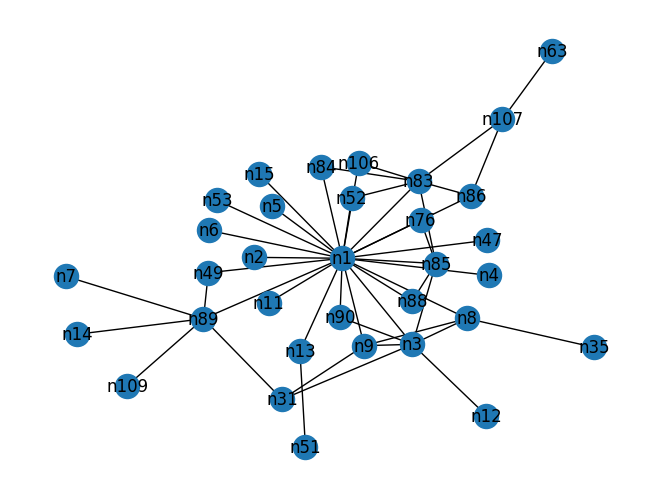

In [29]:
nx.draw(G[4], pos=nx.drawing.nx_agraph.graphviz_layout(G[4]), with_labels=True)  

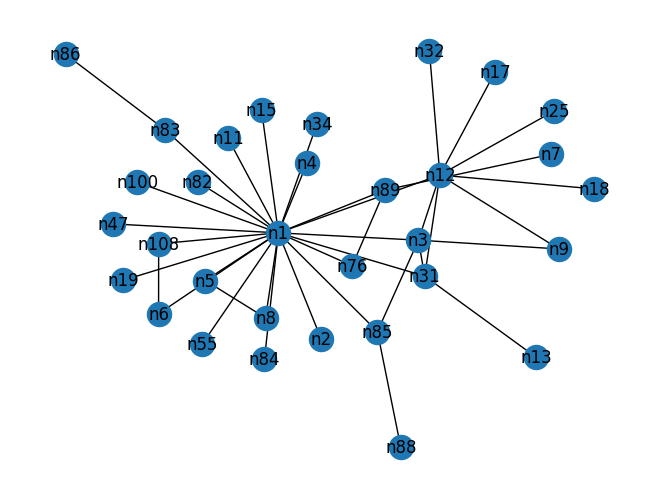

In [30]:
nx.draw(G[5], pos=nx.drawing.nx_agraph.graphviz_layout(G[5]), with_labels=True)  

In [31]:
nx.eigenvector_centrality(G[4])

{'n1': 0.6103793611880546,
 'n4': 0.10573987873923835,
 'n89': 0.16285731175574908,
 'n83': 0.27101453049498864,
 'n3': 0.2726301929204049,
 'n5': 0.10573987873923835,
 'n88': 0.14933693215094906,
 'n85': 0.25166093991419913,
 'n90': 0.1529696362948273,
 'n86': 0.16621734240998517,
 'n2': 0.10573987873923835,
 'n7': 0.02821309030617243,
 'n6': 0.10573987873923835,
 'n8': 0.19447742465332274,
 'n47': 0.10573987873923835,
 'n76': 0.14933693215094906,
 'n9': 0.20590952719486624,
 'n35': 0.03369081256047084,
 'n11': 0.10573987873923835,
 'n53': 0.10573987873923835,
 'n84': 0.15268960861181316,
 'n49': 0.13395296904541074,
 'n107': 0.07808832018945695,
 'n13': 0.10901142487376438,
 'n51': 0.018884933946293665,
 'n63': 0.013527733798172053,
 'n109': 0.02821309030617243,
 'n31': 0.11111414552030668,
 'n12': 0.047229757555588996,
 'n14': 0.02821309030617243,
 'n52': 0.15268960861181316,
 'n106': 0.15268960861181316,
 'n15': 0.10573987873923835}

In [32]:
nx.eigenvector_centrality(G[5])

{'n1': 0.6401993761481244,
 'n4': 0.12209561252997689,
 'n89': 0.1567868114259452,
 'n83': 0.12670416137094895,
 'n3': 0.2756749701547979,
 'n5': 0.15086883393632158,
 'n88': 0.03457022846234928,
 'n85': 0.1812645112256682,
 'n86': 0.024164672574690252,
 'n2': 0.12209561252997689,
 'n7': 0.029901876988642405,
 'n6': 0.15086883393632158,
 'n8': 0.15086883393632158,
 'n55': 0.12209561252997689,
 'n47': 0.12209561252997689,
 'n76': 0.15199748951861927,
 'n9': 0.10616227021857666,
 'n34': 0.12209561252997689,
 'n11': 0.12209561252997689,
 'n32': 0.053586443984483444,
 'n84': 0.12209561252997689,
 'n13': 0.04517580252398116,
 'n31': 0.23687363674741724,
 'n12': 0.2809733678016598,
 'n108': 0.15086883393632158,
 'n100': 0.12209561252997689,
 'n18': 0.053586443984483444,
 'n17': 0.053586443984483444,
 'n25': 0.053586443984483444,
 'n82': 0.12209561252997689,
 'n19': 0.12209561252997689,
 'n15': 0.12209561252997689}

In [33]:
nx.betweenness_centrality(G[4])

{'n1': 0.8393097158218126,
 'n4': 0.0,
 'n89': 0.19621255760368667,
 'n83': 0.0795890937019969,
 'n3': 0.09043778801843318,
 'n5': 0.0,
 'n88': 0.0,
 'n85': 0.016537058371735792,
 'n90': 0.0,
 'n86': 0.04742703533026112,
 'n2': 0.0,
 'n7': 0.0,
 'n6': 0.0,
 'n8': 0.0625,
 'n47': 0.0,
 'n76': 0.0,
 'n9': 0.01476094470046083,
 'n35': 0.0,
 'n11': 0.0,
 'n53': 0.0,
 'n84': 0.0,
 'n49': 0.0,
 'n107': 0.0625,
 'n13': 0.0625,
 'n51': 0.0,
 'n63': 0.0,
 'n109': 0.0,
 'n31': 0.012096774193548387,
 'n12': 0.0,
 'n14': 0.0,
 'n52': 0.0,
 'n106': 0.0,
 'n15': 0.0}

In [34]:
nx.betweenness_centrality(G[5])

{'n1': 0.8838709677419355,
 'n4': 0.0,
 'n89': 0.06451612903225806,
 'n83': 0.06451612903225806,
 'n3': 0.04408602150537634,
 'n5': 0.0,
 'n88': 0.0,
 'n85': 0.06451612903225806,
 'n86': 0.0,
 'n2': 0.0,
 'n7': 0.0,
 'n6': 0.0,
 'n8': 0.0,
 'n55': 0.0,
 'n47': 0.0,
 'n76': 0.0,
 'n9': 0.0,
 'n34': 0.0,
 'n11': 0.0,
 'n32': 0.0,
 'n84': 0.0,
 'n13': 0.0,
 'n31': 0.06451612903225806,
 'n12': 0.2698924731182796,
 'n108': 0.0,
 'n100': 0.0,
 'n18': 0.0,
 'n17': 0.0,
 'n25': 0.0,
 'n82': 0.0,
 'n19': 0.0,
 'n15': 0.0}

| Player | Phase X Eigenvector | Phase X+1 Eigenvector | Phase X Betweenness | Phase X+1 Betweenness |
|--------|---------------------|-----------------------|---------------------|-----------------------|
| n1     | 0.6104              | 0.6402                | 0.8393              | 0.8839                |
| n3     | 0.2726              | 0.2757                | 0.0904              | 0.0441                |
| n89    | 0.1629              | 0.1568                | 0.1962              | 0.0645                |
| n83    | 0.2710              | 0.1267                | 0.0796              | 0.0645                |
| n85    | 0.2517              | 0.1813                | 0.0165              | 0.0645                |
| n12    | 0.0472              | 0.2810                | 0.0000              | 0.2699                |


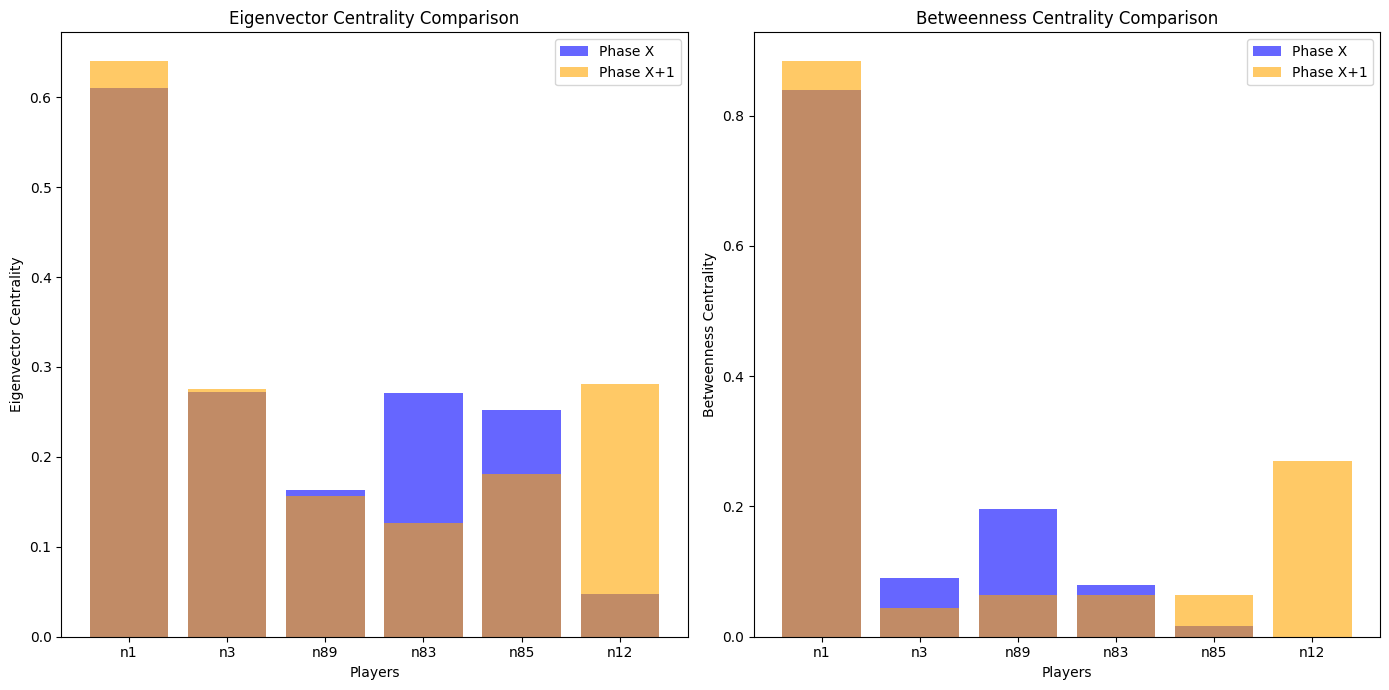

In [35]:
import matplotlib.pyplot as plt

# Data for charts
players = ['n1', 'n3', 'n89', 'n83', 'n85', 'n12']
phase_x_eigenvector = [0.6104, 0.2726, 0.1629, 0.2710, 0.2517, 0.0472]
phase_x1_eigenvector = [0.6402, 0.2757, 0.1568, 0.1267, 0.1813, 0.2810]
phase_x_betweenness = [0.8393, 0.0904, 0.1962, 0.0796, 0.0165, 0.0000]
phase_x1_betweenness = [0.8839, 0.0441, 0.0645, 0.0645, 0.0645, 0.2699]

# Plot Eigenvector Centrality
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.bar(players, phase_x_eigenvector, color='blue', alpha=0.6, label='Phase X')
plt.bar(players, phase_x1_eigenvector, color='orange', alpha=0.6, label='Phase X+1')
plt.xlabel('Players')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality Comparison')
plt.legend()

# Plot Betweenness Centrality
plt.subplot(1, 2, 2)
plt.bar(players, phase_x_betweenness, color='blue', alpha=0.6, label='Phase X')
plt.bar(players, phase_x1_betweenness, color='orange', alpha=0.6, label='Phase X+1')
plt.xlabel('Players')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality Comparison')
plt.legend()

plt.tight_layout()
plt.show()


## Part (g) Global trends

Top Degree Centrality Players: [('n1', 0.601485232986564), ('n3', 0.22350498365361704), ('n12', 0.17089306302153007), ('n85', 0.11801003549912394), ('n76', 0.11223526449967304), ('n83', 0.09583553802511284), ('n87', 0.09026058937367142)]
Top Betweenness Centrality Players: [('n1', 0.655050992293228), ('n12', 0.16756212382251082), ('n3', 0.12940285961873224), ('n76', 0.08379132554240724), ('n87', 0.06132692752337006), ('n41', 0.05036907536907536), ('n89', 0.04794845425622871)]
Top Eigenvector Centrality Players: [('n1', 0.5463910796025788), ('n3', 0.2980946631382842), ('n85', 0.19061181579919984), ('n76', 0.16587744446305683), ('n83', 0.15352180271841845), ('n8', 0.15239397677796265), ('n12', 0.14189335589468527)]


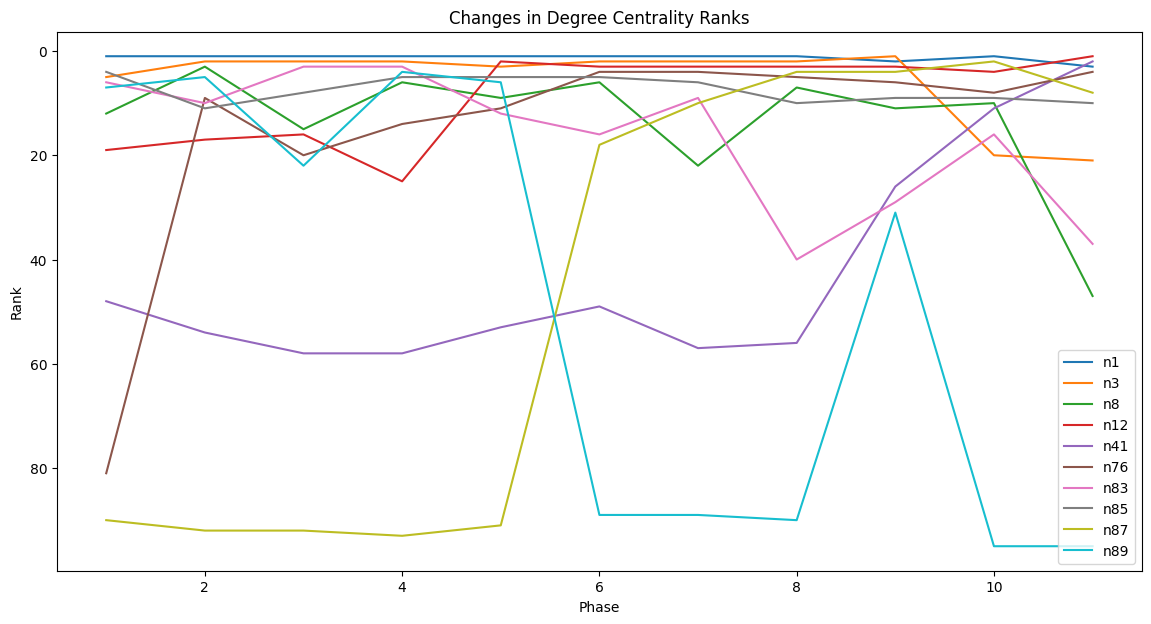

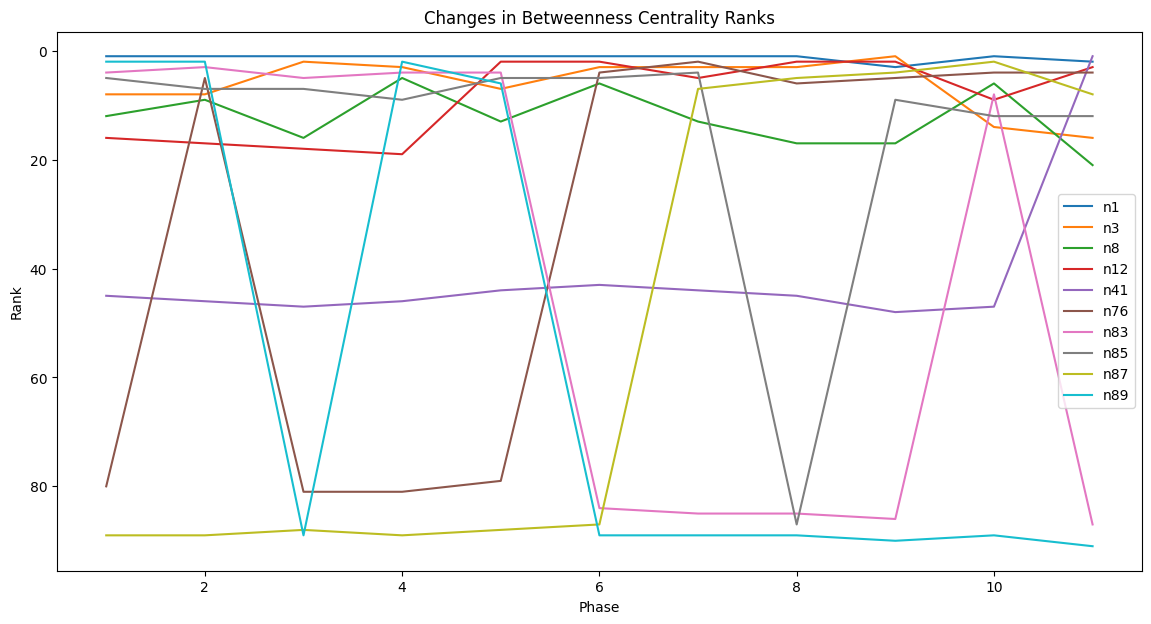

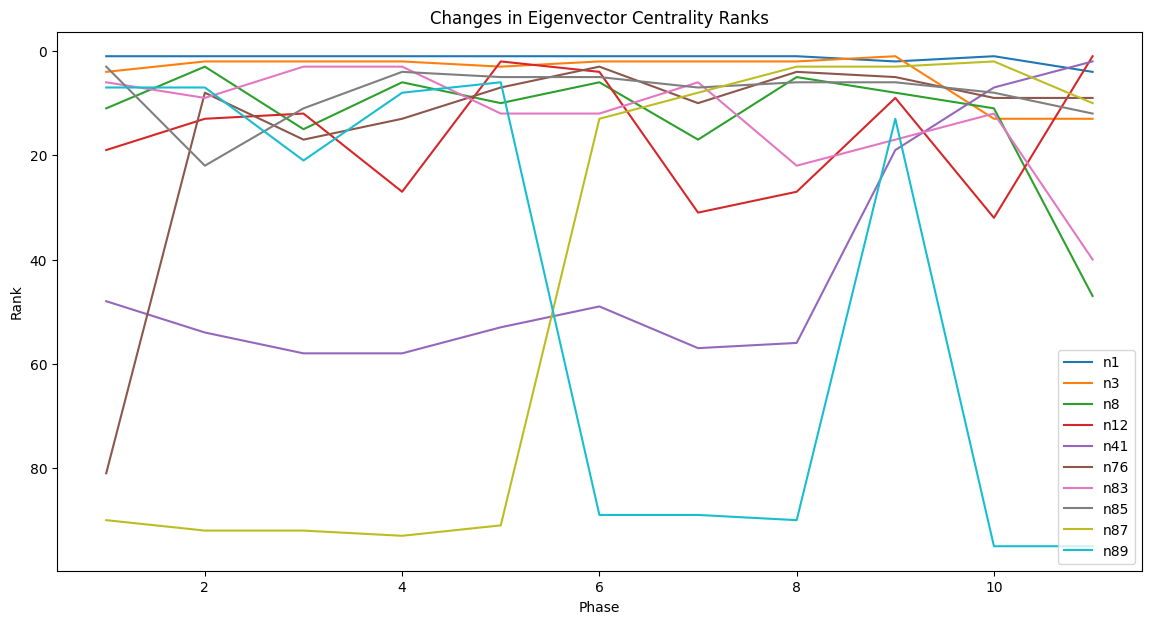

In [40]:
# Initialize dictionaries to store centrality measures
degree_centrality = {f"n{j+1}": [] for j in range(110)}
betweenness_centrality = {f"n{j+1}": [] for j in range(110)}
eigenvector_centrality = {f"n{j+1}": [] for j in range(110)}

# Compute centrality measures for each phase
for i in range(1, 12):
    deg_cent = nx.degree_centrality(G[i])
    bet_cent = nx.betweenness_centrality(G[i])
    eig_cent = nx.eigenvector_centrality(G[i], max_iter=1000)
    
    for node in degree_centrality:
        degree_centrality[node].append(deg_cent.get(node, 0))
        betweenness_centrality[node].append(bet_cent.get(node, 0))
        eigenvector_centrality[node].append(eig_cent.get(node, 0))

# Identify key players based on centrality measures
def get_top_players(centrality_dict, top_n=7):
    mean_centrality = {node: np.mean(centrality) for node, centrality in centrality_dict.items()}
    sorted_centrality = sorted(mean_centrality.items(), key=lambda item: item[1], reverse=True)
    return sorted_centrality[:top_n]

top_degree = get_top_players(degree_centrality)
top_betweenness = get_top_players(betweenness_centrality)
top_eigenvector = get_top_players(eigenvector_centrality)

# Print top players
print("Top Degree Centrality Players:", top_degree)
print("Top Betweenness Centrality Players:", top_betweenness)
print("Top Eigenvector Centrality Players:", top_eigenvector)

# Analyze role changes across phases
def track_changes(centrality_dict):
    changes = {node: [] for node in centrality_dict}
    for i in range(1, 12):
        sorted_nodes = sorted(centrality_dict.items(), key=lambda item: item[1][i-1], reverse=True)
        for rank, (node, _) in enumerate(sorted_nodes):
            changes[node].append(rank + 1)
    return changes

degree_changes = track_changes(degree_centrality)
betweenness_changes = track_changes(betweenness_centrality)
eigenvector_changes = track_changes(eigenvector_centrality)

# Plot changes in centrality ranks for key players
def plot_changes(changes, title):
    plt.figure(figsize=(14, 7))
    for node, ranks in changes.items():
        if node in [n[0] for n in top_degree + top_betweenness + top_eigenvector]:
            plt.plot(range(1, 12), ranks, label=node)
    plt.xlabel('Phase')
    plt.ylabel('Rank')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plot_changes(degree_changes, 'Changes in Degree Centrality Ranks')
plot_changes(betweenness_changes, 'Changes in Betweenness Centrality Ranks')
plot_changes(eigenvector_changes, 'Changes in Eigenvector Centrality Ranks')

## Part (i-j) Directed graph

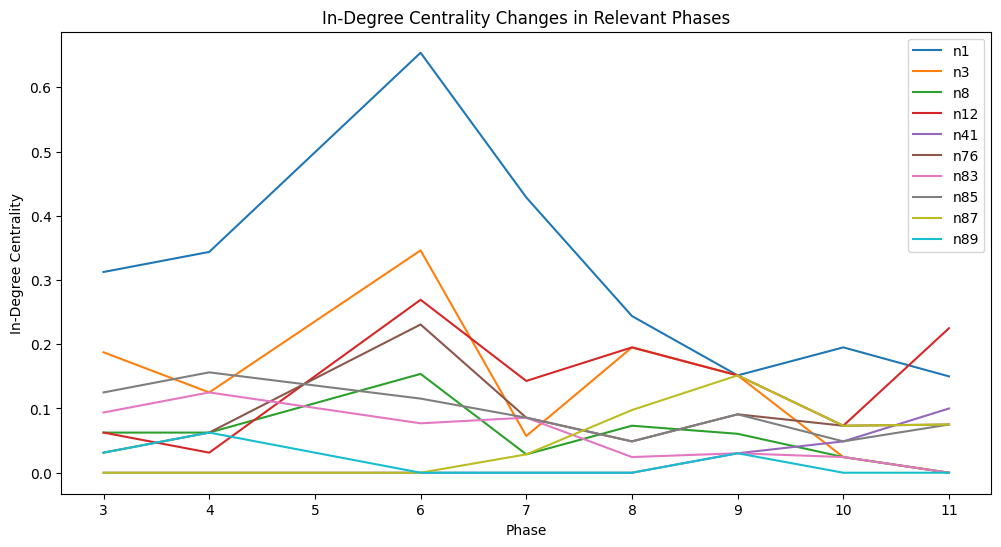

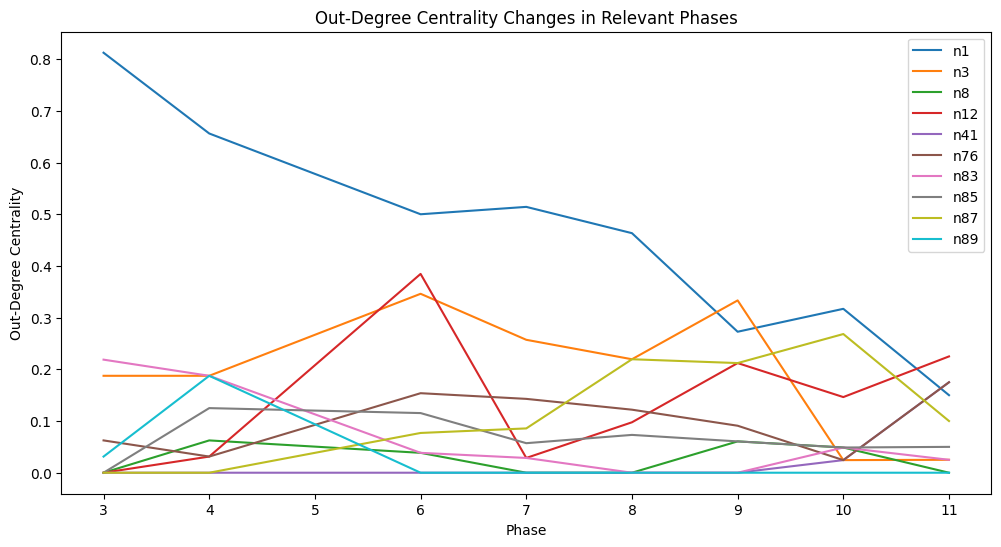

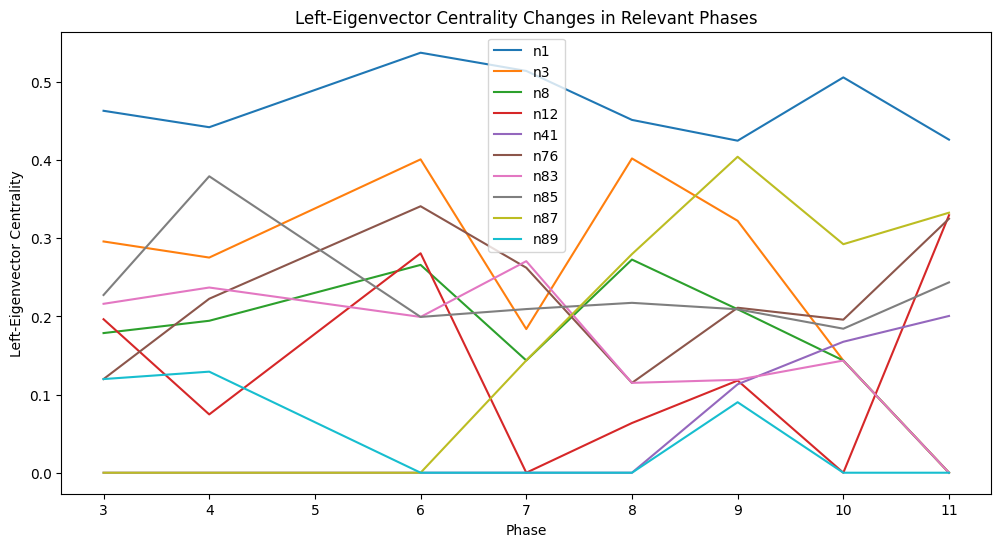

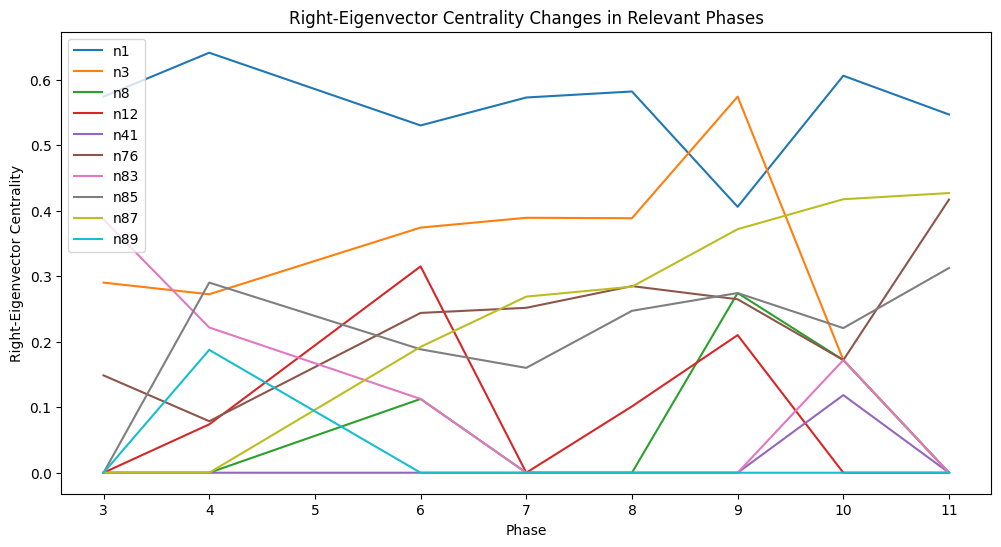

In [44]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load data and create directed graphs
phases = {}
G = {}
for i in range(1, 12):
    var_name = "phase" + str(i)
    file_name = f"https://raw.githubusercontent.com/ragini30/Networks-Homework/main/{var_name}.csv"
    phases[i] = pd.read_csv(file_name, index_col=["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    phases[i][phases[i] > 0] = 1
    G[i] = nx.from_pandas_adjacency(phases[i], create_using=nx.DiGraph)
    G[i].name = var_name

# Initialize dictionaries to store centrality measures for directed graphs
in_degree_centrality = {f"n{j+1}": [0]*11 for j in range(110)}
out_degree_centrality = {f"n{j+1}": [0]*11 for j in range(110)}
left_eigenvector_centrality = {f"n{j+1}": [0]*11 for j in range(110)}
right_eigenvector_centrality = {f"n{j+1}": [0]*11 for j in range(110)}

# Compute centrality measures for each phase
for i in range(1, 12):
    in_deg_cent = nx.in_degree_centrality(G[i])
    out_deg_cent = nx.out_degree_centrality(G[i])
    left_eig_cent = nx.eigenvector_centrality_numpy(G[i], max_iter=1000)
    right_eig_cent = nx.eigenvector_centrality_numpy(G[i].reverse(), max_iter=1000)
    
    for node in in_degree_centrality:
        in_degree_centrality[node][i-1] = in_deg_cent.get(node, 0)
        out_degree_centrality[node][i-1] = out_deg_cent.get(node, 0)
        left_eigenvector_centrality[node][i-1] = left_eig_cent.get(node, 0)
        right_eigenvector_centrality[node][i-1] = right_eig_cent.get(node, 0)

# Function to extract relevant data for specified phases and players
def extract_relevant_data(centrality_dict, phases, players):
    extracted_data = {player: [] for player in players}
    for player in players:
        for phase in phases:
            extracted_data[player].append(centrality_dict[player][phase-1])
    return extracted_data

# Function to plot centrality changes
def plot_directed_centrality_changes(relevant_data, centrality_type):
    plt.figure(figsize=(12, 6))
    for player, values in relevant_data.items():
        plt.plot(relevant_phases, values, label=player)
    plt.xlabel('Phase')
    plt.ylabel(f'{centrality_type} Centrality')
    plt.title(f'{centrality_type} Centrality Changes in Relevant Phases')
    plt.legend()
    plt.show()

# Define relevant phases and key players
relevant_phases = [3, 4, 6, 7, 8, 9, 10, 11]
key_players = ['n1', 'n3', 'n8', 'n12', 'n41', 'n76', 'n83', 'n85', 'n87', 'n89']

# Plot centrality changes for relevant phases and players
in_degree_relevant = extract_relevant_data(in_degree_centrality, relevant_phases, key_players)
plot_directed_centrality_changes(in_degree_relevant, 'In-Degree')

out_degree_relevant = extract_relevant_data(out_degree_centrality, relevant_phases, key_players)
plot_directed_centrality_changes(out_degree_relevant, 'Out-Degree')

left_eigenvector_relevant = extract_relevant_data(left_eigenvector_centrality, relevant_phases, key_players)
plot_directed_centrality_changes(left_eigenvector_relevant, 'Left-Eigenvector')

right_eigenvector_relevant = extract_relevant_data(right_eigenvector_centrality, relevant_phases, key_players)
plot_directed_centrality_changes(right_eigenvector_relevant, 'Right-Eigenvector')


Top In-Degree Centrality Players: [('n1', 0.32172861617758497), ('n3', 0.1245394224735365), ('n12', 0.11926691537368529), ('n85', 0.08665383995519539), ('n76', 0.07430076483273292), ('n8', 0.05965707057429363), ('n83', 0.055631230137878136), ('n9', 0.053982044022409366), ('n88', 0.04996106628294567), ('n6', 0.042061482017493754)]
Top Out-Degree Centrality Players: [('n1', 0.5265218794252958), ('n3', 0.17630712711956512), ('n12', 0.12092991343478418), ('n87', 0.0875057684370323), ('n85', 0.08144028342753008), ('n76', 0.07883818000538909), ('n83', 0.06565260565555608), ('n88', 0.04808926384296141), ('n89', 0.04077851496329757), ('n82', 0.035945953290921456)]
Top Betweenness Centrality Players: [('n1', 0.3041255903709947), ('n12', 0.08324799048564653), ('n3', 0.07237171432062503), ('n76', 0.031968863410186614), ('n87', 0.02944827022570925), ('n85', 0.019596448095374686), ('n89', 0.01947009862507759), ('n14', 0.017951560634487464), ('n82', 0.015366046401245958), ('n88', 0.01178465802971731

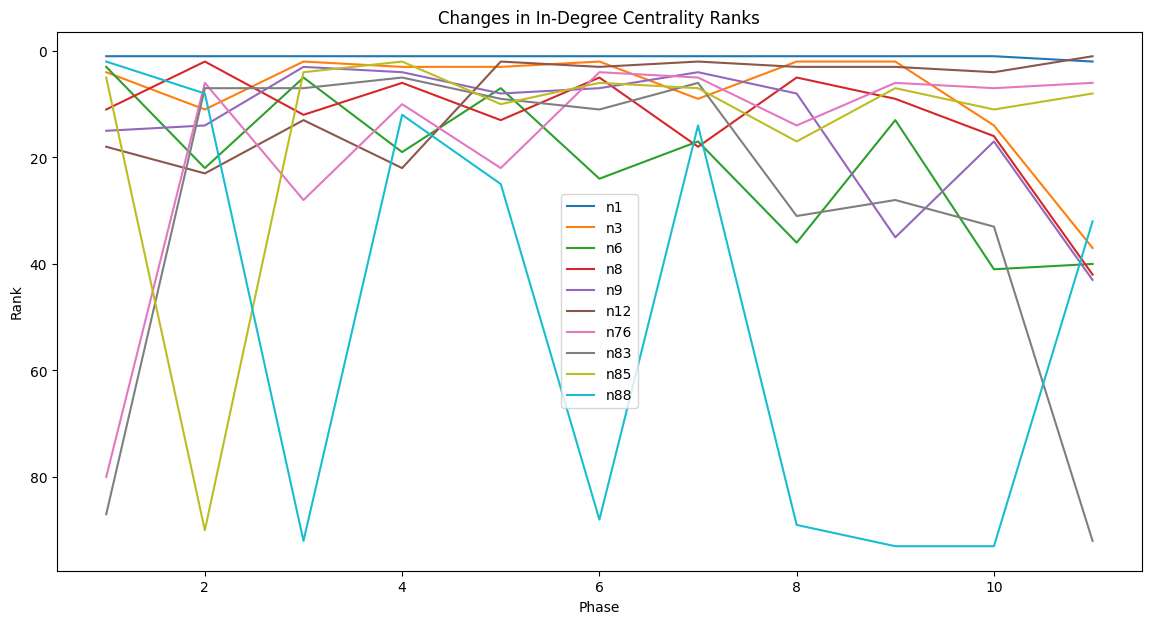

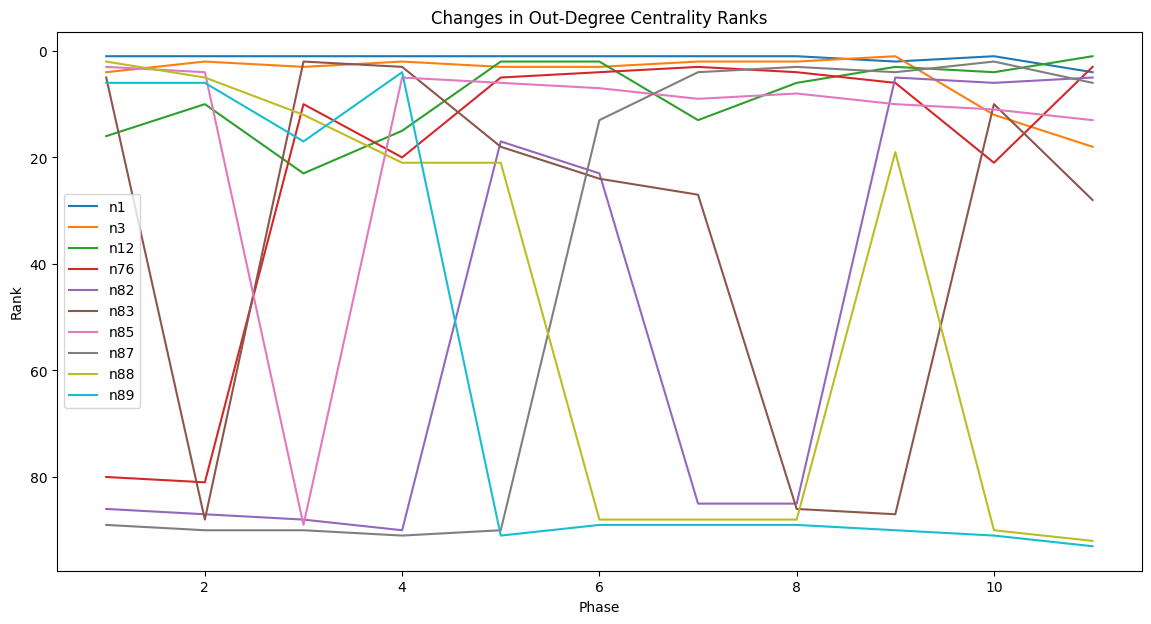

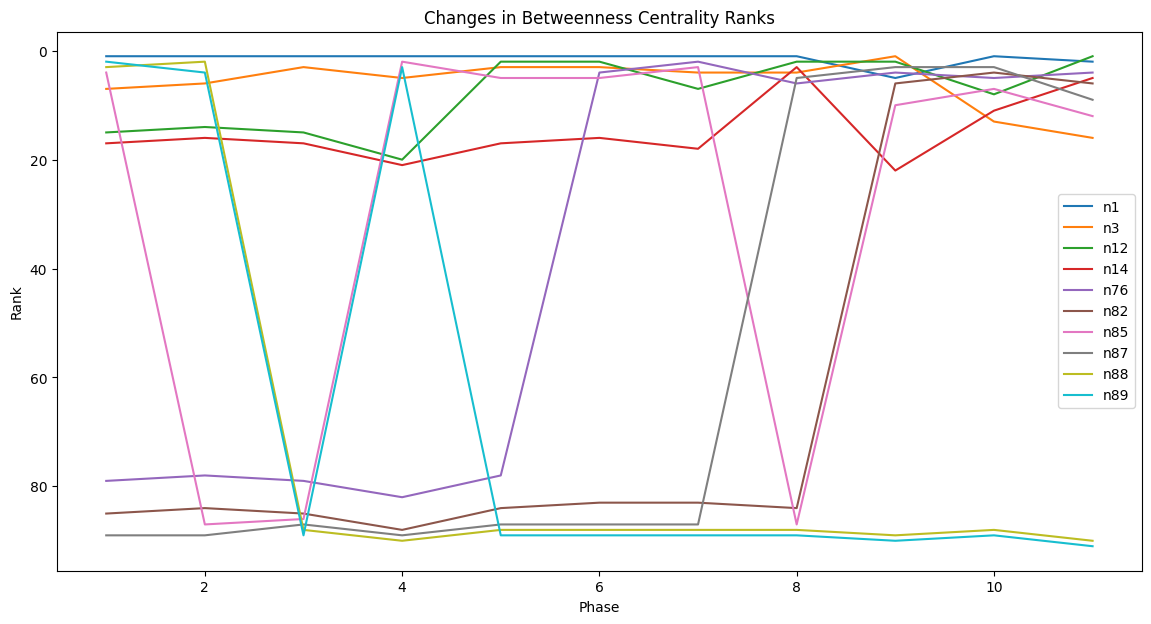

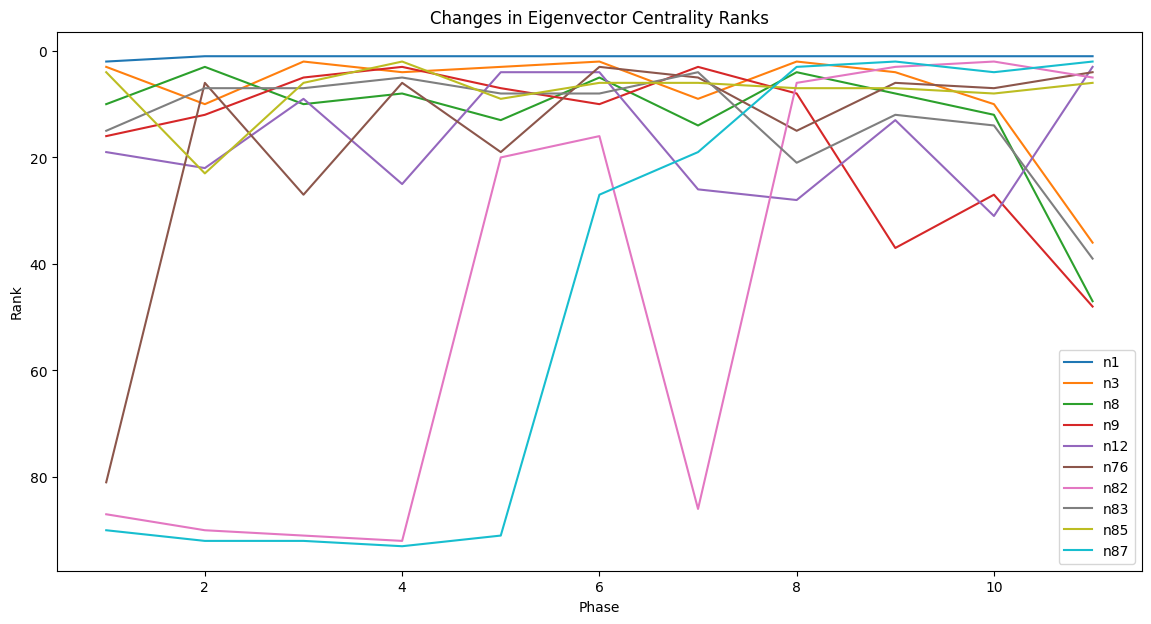

In [46]:
# Initialize dictionaries to store centrality measures for directed graphs
in_degree_centrality = {f"n{j+1}": [] for j in range(110)}
out_degree_centrality = {f"n{j+1}": [] for j in range(110)}
betweenness_centrality = {f"n{j+1}": [] for j in range(110)}
eigenvector_centrality = {f"n{j+1}": [] for j in range(110)}

# Compute centrality measures for each phase
for i in range(1, 12):
    in_deg_cent = nx.in_degree_centrality(G[i])
    out_deg_cent = nx.out_degree_centrality(G[i])
    bet_cent = nx.betweenness_centrality(G[i], normalized=True)
    eig_cent = nx.eigenvector_centrality(G[i], max_iter=1000)
    
    for node in in_degree_centrality:
        in_degree_centrality[node].append(in_deg_cent.get(node, 0))
        out_degree_centrality[node].append(out_deg_cent.get(node, 0))
        betweenness_centrality[node].append(bet_cent.get(node, 0))
        eigenvector_centrality[node].append(eig_cent.get(node, 0))

# Identify key players based on centrality measures
def get_top_players(centrality_dict, top_n=10):
    mean_centrality = {node: np.mean(centrality) for node, centrality in centrality_dict.items()}
    sorted_centrality = sorted(mean_centrality.items(), key=lambda item: item[1], reverse=True)
    return sorted_centrality[:top_n]

top_in_degree = get_top_players(in_degree_centrality)
top_out_degree = get_top_players(out_degree_centrality)
top_betweenness = get_top_players(betweenness_centrality)
top_eigenvector = get_top_players(eigenvector_centrality)

# Print top players
print("Top In-Degree Centrality Players:", top_in_degree)
print("Top Out-Degree Centrality Players:", top_out_degree)
print("Top Betweenness Centrality Players:", top_betweenness)
print("Top Eigenvector Centrality Players:", top_eigenvector)

# Analyze role changes across phases
def track_changes(centrality_dict):
    changes = {node: [] for node in centrality_dict}
    for i in range(1, 12):
        sorted_nodes = sorted(centrality_dict.items(), key=lambda item: item[1][i-1], reverse=True)
        for rank, (node, _) in enumerate(sorted_nodes):
            changes[node].append(rank + 1)
    return changes

in_degree_changes = track_changes(in_degree_centrality)
out_degree_changes = track_changes(out_degree_centrality)
betweenness_changes = track_changes(betweenness_centrality)
eigenvector_changes = track_changes(eigenvector_centrality)

# Plot changes in centrality ranks for key players
def plot_changes(changes, title, top_players):
    plt.figure(figsize=(14, 7))
    for node, ranks in changes.items():
        if node in [n[0] for n in top_players]:
            plt.plot(range(1, 12), ranks, label=node)
    plt.xlabel('Phase')
    plt.ylabel('Rank')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plot_changes(in_degree_changes, 'Changes in In-Degree Centrality Ranks', top_in_degree)
plot_changes(out_degree_changes, 'Changes in Out-Degree Centrality Ranks', top_out_degree)
plot_changes(betweenness_changes, 'Changes in Betweenness Centrality Ranks', top_betweenness)
plot_changes(eigenvector_changes, 'Changes in Eigenvector Centrality Ranks', top_eigenvector)

n1 Hub Scores: [0.42165703206200866, 0.6730461473415296, 0.3597120696002089, 0.3613662725098645, 0.4306980738280466, 0.09909912085791665, 0.25433380983289355, 0.2530205791689488, 0.19356100497168802, 0.2386533259433502, 0.11180235895801073]
n1 Authority Scores: [0.07910149056463373, 0.006215642713498496, 0.043209914224582945, 0.04149745164095537, 0.030840336831043893, 0.18229305904210127, 0.09394693203813462, 0.07123252349392596, 0.08227168310777652, 0.0765962542963788, 0.10882195889929007]
n3 Hub Scores: [0.09447758768575637, 0.08576021405393171, 0.0845795871375207, 0.08930239500501046, 0.0840097688646314, 0.09934405001911648, 0.15915858217344692, 0.12658803298610452, 0.242785772604235, 0.029218545032931274, 0.017407426539468904]
n3 Authority Scores: [0.0946534674403628, 0.05613489183442581, 0.0508738642649981, 0.0504957006175218, 0.059293160878327374, 0.1237428152126849, 0.04350896926013675, 0.08182765888995423, 0.04078225704154393, 0.033213256534787225, 3.0850875866523874e-18]


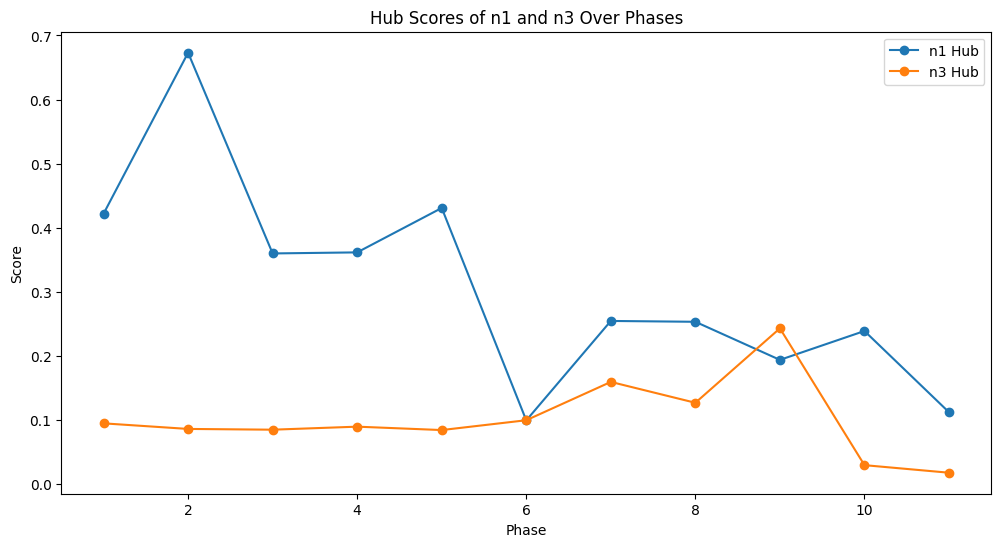

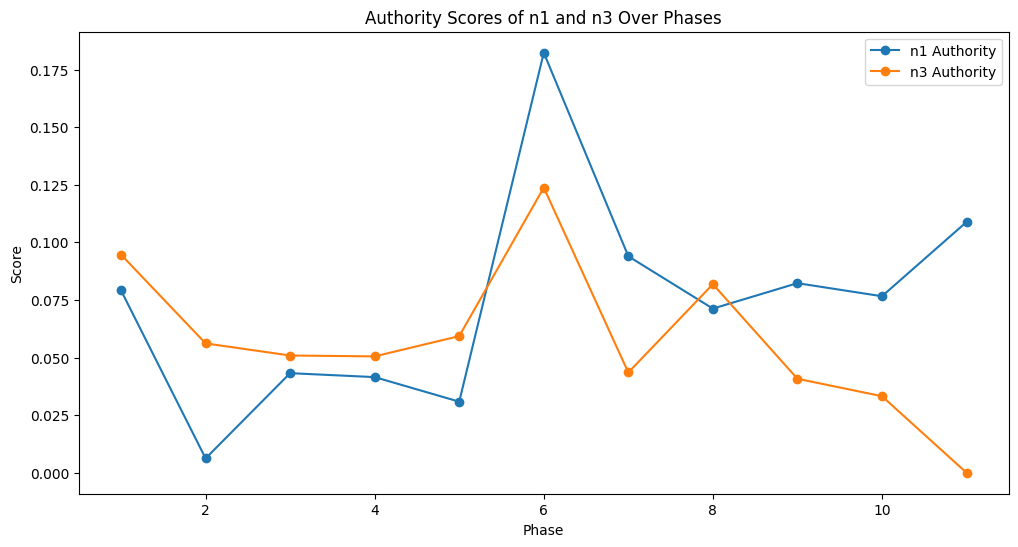

In [47]:
# Initialize dictionaries to store hub and authority scores
hub_scores = {f"n{j+1}": [] for j in range(110)}
authority_scores = {f"n{j+1}": [] for j in range(110)}

# Compute hub and authority scores for each phase
for i in range(1, 12):
    hubs, authorities = nx.hits(G[i], max_iter=1000000)
    for node in hub_scores:
        hub_scores[node].append(hubs.get(node, 0))
        authority_scores[node].append(authorities.get(node, 0))

# Analyze the relationship between n1 and n3
n1_hub_scores = hub_scores['n1']
n1_authority_scores = authority_scores['n1']
n3_hub_scores = hub_scores['n3']
n3_authority_scores = authority_scores['n3']

# Print the hub and authority scores for n1 and n3
print("n1 Hub Scores:", n1_hub_scores)
print("n1 Authority Scores:", n1_authority_scores)
print("n3 Hub Scores:", n3_hub_scores)
print("n3 Authority Scores:", n3_authority_scores)

# Function to plot hub and authority scores
import matplotlib.pyplot as plt

def plot_scores(scores1, scores2, label1, label2, title):
    plt.figure(figsize=(12, 6))
    phases_range = list(range(1, 12))
    plt.plot(phases_range, scores1, label=label1, marker='o')
    plt.plot(phases_range, scores2, label=label2, marker='o')
    plt.xlabel('Phase')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.show()

plot_scores(n1_hub_scores, n3_hub_scores, 'n1 Hub', 'n3 Hub', 'Hub Scores of n1 and n3 Over Phases')
plot_scores(n1_authority_scores, n3_authority_scores, 'n1 Authority', 'n3 Authority', 'Authority Scores of n1 and n3 Over Phases')

# Open-ended project

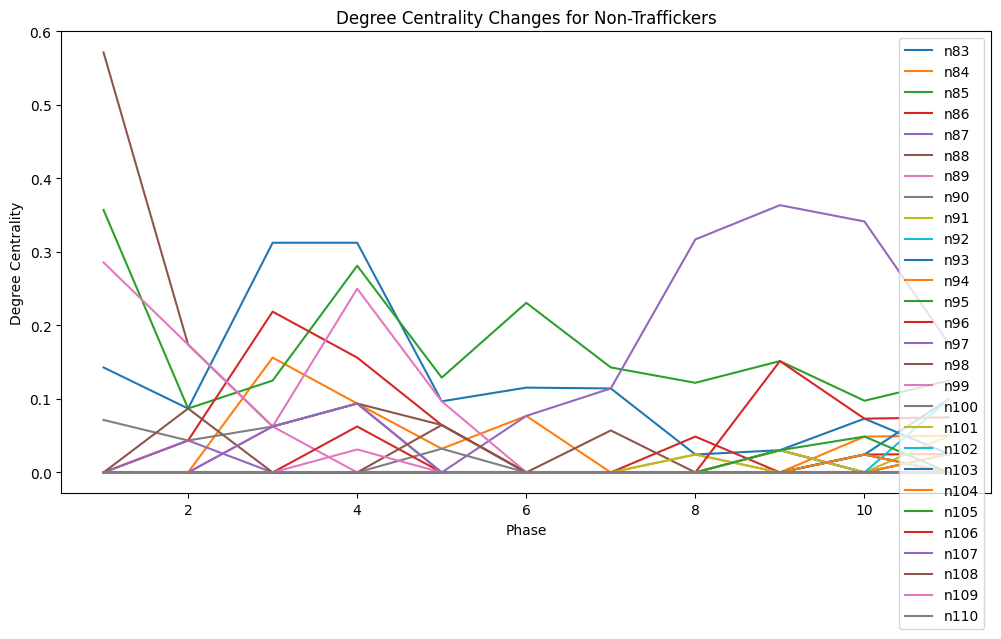

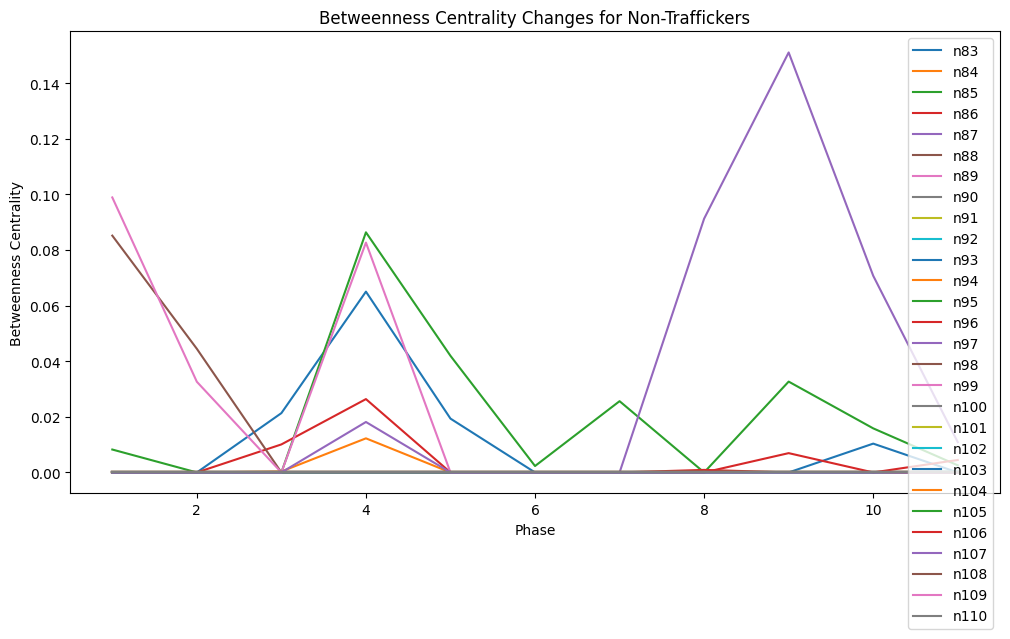

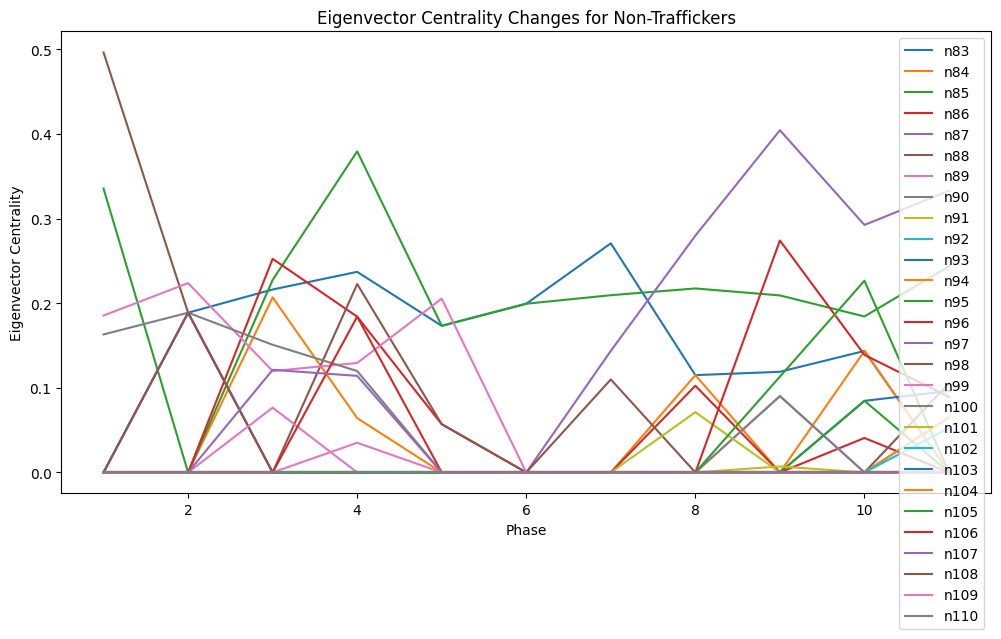

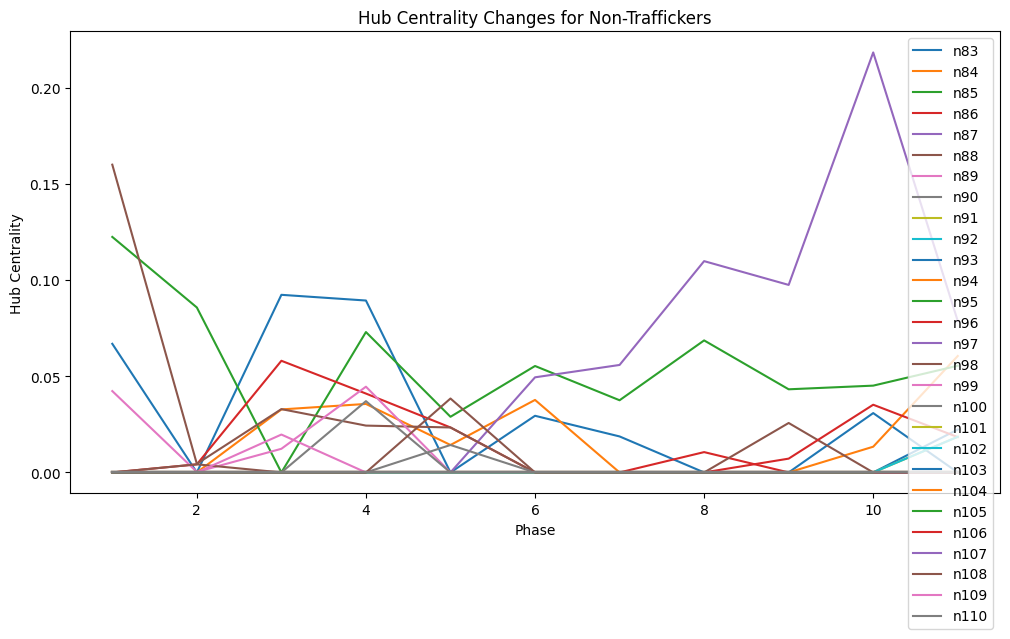

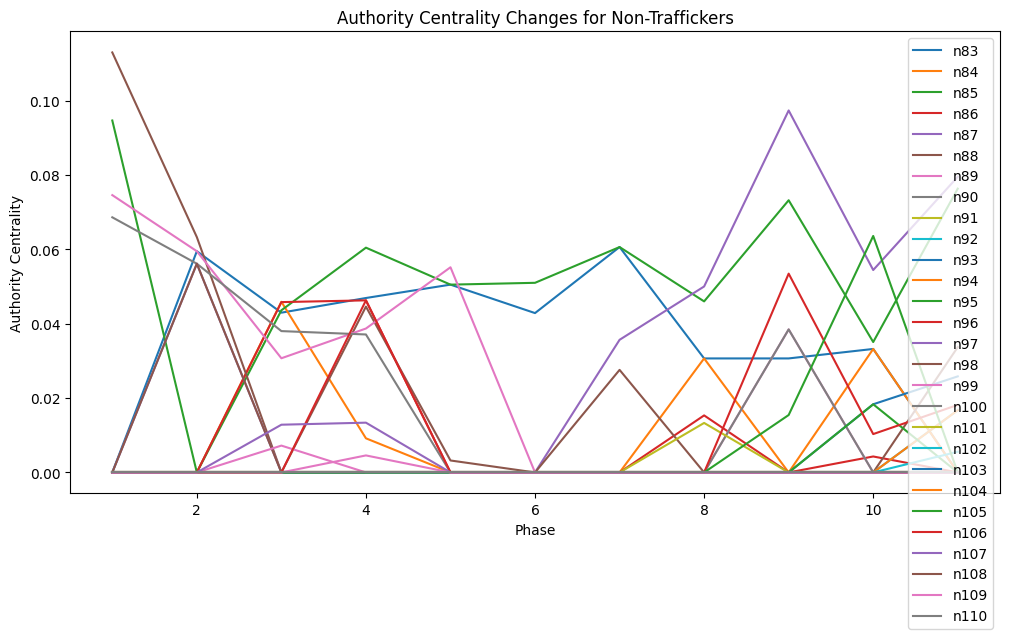

/Users/macbook/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/m

Phase 1: Clustering labels: [0 4 3 2 1 0 1 1 0 0 3 4 2 0 0]
Phase 2: Clustering labels: [1 0 2 3 1 4 4 1 1 1 0 2 3 3 1 3 1 1 1 1 4 1 0 1]
Phase 3: Clustering labels: [4 1 4 4 0 1 4 0 0 4 4 2 4 0 3 4 4 4 0 3 2 4 4 2 4 4 4 4 0 3 3 0 4]
Phase 4: Clustering labels: [0 0 1 0 3 0 0 0 0 0 0 1 0 3 0 0 3 3 0 0 0 1 4 2 2 4 1 3 3 1 0 0 0]
Phase 5: Clustering labels: [1 1 0 3 2 1 4 4 3 1 0 1 1 1 1 1 2 1 1 2 1 2 2 2 1 1 2 2 2 1 1 1]
Phase 6: Clustering labels: [0 0 0 0 0 4 0 0 4 3 0 2 4 1 1 1 1 1 1 1 0 0 3 0 0 2 0]
Phase 7: Clustering labels: [0 0 2 3 0 3 3 0 2 0 0 0 0 4 0 0 1 0 1 1 0 4 0 0 0 1 3 4 0 4 0 1 1 0 0 0]
Phase 8: Clustering labels: [0 0 0 0 0 0 3 0 0 0 2 3 3 4 0 1 1 0 1 1 1 0 0 0 0 2 0 1 1 0 2 0 2 0 2 0 2
 1 1 1 2 4]
Phase 9: Clustering labels: [1 1 1 1 1 1 1 1 0 1 1 1 1 2 2 2 2 2 4 0 3 0 2 3 1 3 4 4 4 2 4 3 0 3]
Phase 10: Clustering labels: [0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 4 3 2 2 3 3 3 3 2 2 0 0 3 3 3 1 1 3 3 3 3 4
 3 3 3 2 0]
Phase 11: Clustering labels: [0 1 2 0 0 1 0 0 0 2 2 4 2 2 0 3

/Users/macbook/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/macbook/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/macbook/Library/Python/3.9/lib/python/si

In [48]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering

# Load data and create directed graphs
phases = {}
G = {}
for i in range(1, 12):
    var_name = "phase" + str(i)
    file_name = f"https://raw.githubusercontent.com/ragini30/Networks-Homework/main/{var_name}.csv"
    phases[i] = pd.read_csv(file_name, index_col=["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    phases[i][phases[i] > 0] = 1
    G[i] = nx.from_pandas_adjacency(phases[i], create_using=nx.DiGraph)
    G[i].name = var_name

# Separate traffickers and non-traffickers
traffickers = [f"n{j}" for j in range(1, 83)]
non_traffickers = [f"n{j}" for j in range(83, 111)]

# Compute centrality measures
centrality_measures = {
    'degree': {},
    'betweenness': {},
    'eigenvector': {},
    'hub': {},
    'authority': {}
}

for i in range(1, 12):
    centrality_measures['degree'][i] = nx.degree_centrality(G[i])
    centrality_measures['betweenness'][i] = nx.betweenness_centrality(G[i])
    centrality_measures['eigenvector'][i] = nx.eigenvector_centrality(G[i], max_iter=1000)
    hubs, authorities = nx.hits(G[i], max_iter=1000000)
    centrality_measures['hub'][i] = hubs
    centrality_measures['authority'][i] = authorities

# Analyze and plot centrality measures for non-traffickers
def plot_centrality_changes(centrality_type, nodes):
    plt.figure(figsize=(12, 6))
    for node in nodes:
        values = [centrality_measures[centrality_type][i].get(node, 0) for i in range(1, 12)]
        plt.plot(range(1, 12), values, label=node)
    plt.xlabel('Phase')
    plt.ylabel(f'{centrality_type.capitalize()} Centrality')
    plt.title(f'{centrality_type.capitalize()} Centrality Changes for Non-Traffickers')
    plt.legend()
    plt.show()

plot_centrality_changes('degree', non_traffickers)
plot_centrality_changes('betweenness', non_traffickers)
plot_centrality_changes('eigenvector', non_traffickers)
plot_centrality_changes('hub', non_traffickers)
plot_centrality_changes('authority', non_traffickers)

# Implement spectral clustering and analyze clusters
for i in range(1, 12):
    adj_matrix = nx.to_numpy_array(G[i])
    sc = SpectralClustering(n_clusters=5, affinity='precomputed', random_state=42)
    labels = sc.fit_predict(adj_matrix)
    print(f'Phase {i}: Clustering labels:', labels)


In [51]:
import pandas as pd
import networkx as nx
import numpy as np
from scipy.stats import ttest_ind

# Load data and create directed graphs
phases = {}
G = {}
for i in range(1, 12):
    var_name = "phase" + str(i)
    file_name = f"https://raw.githubusercontent.com/ragini30/Networks-Homework/main/{var_name}.csv"
    phases[i] = pd.read_csv(file_name, index_col=["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    phases[i][phases[i] > 0] = 1
    G[i] = nx.from_pandas_adjacency(phases[i], create_using=nx.DiGraph)
    G[i].name = var_name

# Identify central criminal figures (expand list to 10)
central_figures = ['n1', 'n3', 'n12', 'n41', 'n83', 'n85', 'n86', 'n87']

# Function to extract first-order connections
def get_first_order_network(G, node):
    if node not in G:
        return nx.DiGraph()  # Return an empty graph if the node is not present
    neighbors = list(G.neighbors(node)) + [n for n in G if node in G[n]]
    subgraph = G.subgraph(neighbors + [node])
    return subgraph

# Dictionary to store first-order networks for each phase
first_order_networks = {i: {} for i in range(1, 12)}
for i in range(1, 12):
    for node in central_figures:
        first_order_networks[i][node] = get_first_order_network(G[i], node)

# Calculate centrality measures for first-order networks
centrality_measures = {i: {node: {} for node in central_figures} for i in range(1, 12)}
for i in range(1, 12):
    for node in central_figures:
        subgraph = first_order_networks[i][node]
        if len(subgraph) == 0:
            centrality_measures[i][node]['degree'] = {}
            centrality_measures[i][node]['betweenness'] = {}
            centrality_measures[i][node]['eigenvector'] = {}
            centrality_measures[i][node]['hub'] = {}
            centrality_measures[i][node]['authority'] = {}
        else:
            centrality_measures[i][node]['degree'] = nx.degree_centrality(subgraph)
            centrality_measures[i][node]['betweenness'] = nx.betweenness_centrality(subgraph)
            centrality_measures[i][node]['eigenvector'] = nx.eigenvector_centrality(subgraph, max_iter=1000)
            hubs, authorities = nx.hits(subgraph, max_iter=1000000)
            centrality_measures[i][node]['hub'] = hubs
            centrality_measures[i][node]['authority'] = authorities

# Extract centrality values for statistical tests
def extract_centrality_values(centrality_measures, measure):
    values = {node: [] for node in central_figures}
    for i in range(1, 12):
        for node in central_figures:
            centrality_values = list(centrality_measures[i][node][measure].values())
            if centrality_values:
                values[node].append(np.mean(centrality_values))
            else:
                values[node].append(0)
    return values

degree_values = extract_centrality_values(centrality_measures, 'degree')
betweenness_values = extract_centrality_values(centrality_measures, 'betweenness')
eigenvector_values = extract_centrality_values(centrality_measures, 'eigenvector')
hub_values = extract_centrality_values(centrality_measures, 'hub')
authority_values = extract_centrality_values(centrality_measures, 'authority')

# Perform statistical tests
def perform_stat_tests(values):
    for node1 in central_figures:
        for node2 in central_figures:
            if node1 != node2:
                t_stat, p_value = ttest_ind(values[node1], values[node2], equal_var=False)
                print(f"T-test between {node1} and {node2}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

print("Degree Centrality T-tests:")
perform_stat_tests(degree_values)
print("\nBetweenness Centrality T-tests:")
perform_stat_tests(betweenness_values)
print("\nEigenvector Centrality T-tests:")
perform_stat_tests(eigenvector_values)
print("\nHub Centrality T-tests:")
perform_stat_tests(hub_values)
print("\nAuthority Centrality T-tests:")
perform_stat_tests(authority_values)


Degree Centrality T-tests:
T-test between n1 and n3: t-statistic = -3.2997, p-value = 0.0066
T-test between n1 and n12: t-statistic = -1.8618, p-value = 0.0881
T-test between n1 and n41: t-statistic = 0.0096, p-value = 0.9925
T-test between n1 and n83: t-statistic = -6.2946, p-value = 0.0000
T-test between n1 and n85: t-statistic = -8.2831, p-value = 0.0000
T-test between n1 and n86: t-statistic = -2.1941, p-value = 0.0500
T-test between n1 and n87: t-statistic = -0.9926, p-value = 0.3404
T-test between n3 and n1: t-statistic = 3.2997, p-value = 0.0066
T-test between n3 and n12: t-statistic = 1.0657, p-value = 0.2993
T-test between n3 and n41: t-statistic = 2.5102, p-value = 0.0208
T-test between n3 and n83: t-statistic = -0.3674, p-value = 0.7183
T-test between n3 and n85: t-statistic = -0.9590, p-value = 0.3537
T-test between n3 and n86: t-statistic = 0.5987, p-value = 0.5562
T-test between n3 and n87: t-statistic = 1.8769, p-value = 0.0754
T-test between n12 and n1: t-statistic = 1.

In [55]:
import networkx as nx
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp, ttest_ind

# Load observed networks
phases = {}
for i in range(1, 12):
    file_name = f"https://raw.githubusercontent.com/ragini30/Networks-Homework/main/phase{i}.csv"
    phases[i] = pd.read_csv(file_name, index_col=["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    phases[i][phases[i] > 0] = 1

# Function to compare properties of observed and theoretical networks
def compare_networks(G_obs, G_theo):
    # Degree distribution
    degrees_obs = [d for n, d in G_obs.degree()]
    degrees_theo = [d for n, d in G_theo.degree()]
    ks_test = ks_2samp(degrees_obs, degrees_theo)
    
    # Clustering coefficient
    clustering_obs = nx.average_clustering(G_obs)
    clustering_theo = nx.average_clustering(G_theo)
    clustering_ttest = ttest_ind([clustering_obs], [clustering_theo])
    
    # Average path length
    if nx.is_connected(G_obs) and nx.is_connected(G_theo):
        path_length_obs = nx.average_shortest_path_length(G_obs)
        path_length_theo = nx.average_shortest_path_length(G_theo)
        path_length_ttest = ttest_ind([path_length_obs], [path_length_theo])
    else:
        path_length_ttest = (np.nan, np.nan)  # Not applicable if not connected

    return {
        'ks_test': ks_test,
        'clustering_ttest': clustering_ttest,
        'path_length_ttest': path_length_ttest
    }

# Analyze each phase
results = {}
for i in range(1, 12):
    G_obs = nx.from_pandas_adjacency(phases[i])
    n = len(G_obs)
    m = G_obs.number_of_edges()
    k_avg = 2 * m / n

    # Generate theoretical networks
    G_er = nx.gnm_random_graph(n, m)
    degree_sequence = sorted([d for n, d in G_obs.degree()], reverse=True)
    G_cm = nx.configuration_model(degree_sequence)
    G_pa = nx.barabasi_albert_graph(n, int(k_avg // 2))
    G_sw = nx.watts_strogatz_graph(n, int(k_avg), 0.1)
    
    # Convert configuration model to simple graph
    G_cm = nx.Graph(G_cm)
    G_cm.remove_edges_from(nx.selfloop_edges(G_cm))

    # Compare networks
    results[i] = {
        'ER': compare_networks(G_obs, G_er),
        'CM': compare_networks(G_obs, G_cm),
        'PA': compare_networks(G_obs, G_pa),
        'SW': compare_networks(G_obs, G_sw)
    }

# Print results
for i in range(1, 12):
    print(f"Phase {i}:")
    for model in ['ER', 'CM', 'PA', 'SW']:
        print(f"  {model} Model:")
        print(f"    KS Test for Degree Distribution: {results[i][model]['ks_test']}")
        print(f"    T-Test for Clustering Coefficient: {results[i][model]['clustering_ttest']}")
        print(f"    T-Test for Path Length: {results[i][model]['path_length_ttest']}")


/Users/macbook/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
/var/folders/_v/8jq1t1c577d0k4jm1h52b4tm0000gn/T/ipykernel_1316/3617184420.py:20: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_test = ks_2samp(degrees_obs, degrees_theo)


Phase 1:
  ER Model:
    KS Test for Degree Distribution: KstestResult(statistic=0.26666666666666666, pvalue=0.6781382270680966, statistic_location=1, statistic_sign=1)
    T-Test for Clustering Coefficient: TtestResult(statistic=nan, pvalue=nan, df=0.0)
    T-Test for Path Length: (nan, nan)
  CM Model:
    KS Test for Degree Distribution: KstestResult(statistic=0.06666666666666667, pvalue=0.9999999999990623, statistic_location=2, statistic_sign=-1)
    T-Test for Clustering Coefficient: TtestResult(statistic=nan, pvalue=nan, df=0.0)
    T-Test for Path Length: (nan, nan)
  PA Model:
    KS Test for Degree Distribution: KstestResult(statistic=0.13333333333333333, pvalue=0.9997887537139585, statistic_location=1, statistic_sign=-1)
    T-Test for Clustering Coefficient: TtestResult(statistic=nan, pvalue=nan, df=0.0)
    T-Test for Path Length: TtestResult(statistic=nan, pvalue=nan, df=0.0)
  SW Model:
    KS Test for Degree Distribution: KstestResult(statistic=0.4666666666666667, pvalue